<div dir="rtl">

---

### 📚 **کتابخانه‌های اصلی برای کار با داده‌ها**

```python
import numpy as np
import pandas as pd
```

* `numpy` برای محاسبات عددی و آرایه‌ها.
* `pandas` برای خواندن، تحلیل، و دستکاری داده‌ها (مثل DataFrameها).



### 📊 **کتابخانه‌های تصویری‌سازی داده**

```python
import matplotlib.pyplot as plt
import seaborn as sns
```

* `matplotlib.pyplot` برای رسم نمودارهای پایه‌ای مثل نمودار خطی یا هیستوگرام.
* `seaborn` برای رسم نمودارهای آماری پیچیده‌تر مثل heatmap یا pairplot با ظاهری زیباتر.



### ⚙️ **پیش‌پردازش و تقسیم داده‌ها**

```python
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
```

* `train_test_split`: تقسیم داده به داده‌های آموزش و تست.
* `StratifiedKFold`: تقسیم داده به چند بخش برای cross-validation با حفظ نسبت کلاس‌ها.
* `cross_validate`: اجرای مدل با cross-validation و محاسبه چندین معیار.
* `StandardScaler`: نرمال‌سازی ویژگی‌ها (ویژگی‌ها میانگین صفر و واریانس یک پیدا می‌کنن).


### 🤖 **مدل‌های یادگیری ماشین**

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
```

* `RandomForestClassifier`: مدل درخت تصمیم ترکیبی.
* `MLPClassifier`: مدل شبکه عصبی چند لایه (Multi-Layer Perceptron).
* `SVC`: ماشین بردار پشتیبان (Support Vector Classifier).


### ✅ **معیارهای ارزیابی مدل**

```python
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)
```

* برای ارزیابی عملکرد مدل مثل:

  * دقت (`accuracy_score`)
  * ماتریس آشفتگی (`confusion_matrix`)
  * امتیاز F1
  * دقت و بازیابی (precision و recall)
  * سطح زیر منحنی ROC (AUC)
  * خود منحنی ROC



In [97]:
# -----------------------------------------
# 📚 Essential Libraries for Data Handling
# -----------------------------------------
import numpy as np                # For numerical operations
import pandas as pd               # For data manipulation and analysis

# -----------------------------------------
# 📊 Libraries for Data Visualization
# -----------------------------------------
import matplotlib.pyplot as plt   # For creating basic plots
import seaborn as sns             # For advanced and statistical visualizations

# -----------------------------------------
# ⚙️ Data Preprocessing and Splitting
# -----------------------------------------
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

# -----------------------------------------
# 🤖 Machine Learning Models
# -----------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# -----------------------------------------
# ✅ Model Evaluation Metrics
# -----------------------------------------
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)

<div dir="rtl">

---

### 📌 **پیش‌نمایش اولیه دیتاست هپاتیت**

این بخش از کد وظیفه دارد فایل دیتاست را بارگذاری کرده و نگاهی اولیه به آن بیندازد:

1. 🖨️ **چاپ پیام راهنما**
   یک پیام متنی چاپ می‌شود تا به کاربر اطلاع دهد که در حال مشاهده نسخه خام دیتاست هستیم و ممکن است مقادیر گمشده با نماد `?` نمایش داده شده باشند.

2. 📥 **خواندن فایل CSV**
   فایل `hepatitis.csv` از مسیر فعلی بارگذاری شده و در یک DataFrame با نام `preview_df` ذخیره می‌شود.

3. 👀 **نمایش ۵ ردیف اول داده‌ها**
   برای آشنایی اولیه با ساختار ستون‌ها و مقادیر موجود، پنج ردیف اول دیتافریم نمایش داده می‌شود.


In [98]:
# 🔍 Preview the raw hepatitis dataset (note: missing values are represented by '?')
print("🔍 Preview of the raw hepatitis dataset (missing values may be represented as '?'):")

preview_df = pd.read_csv('hepatitis.csv')
preview_df.head()

🔍 Preview of the raw hepatitis dataset (missing values may be represented as '?'):


,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1,2,2,2,2,1,...,2,2,2,2,1,85,18,4,?,1
1,2,2,50,1,1,2,1,2,2,1,...,2,2,2,2,0.9,135,42,3.5,?,1
2,3,2,78,1,2,2,1,2,2,2,...,2,2,2,2,0.7,96,32,4,?,1
3,4,2,31,1,?,1,2,2,2,2,...,2,2,2,2,0.7,46,52,4,80,1
4,5,2,34,1,2,2,2,2,2,2,...,2,2,2,2,1,?,200,4,?,1


<div dir="rtl">

---

### 📌 **بارگذاری دیتاست و بررسی مقدارهای گمشده**

در این مرحله، داده‌ها به‌درستی خوانده می‌شوند و مقادیر گمشده شناسایی و شمارش می‌شوند:



1. 📥 **بارگذاری دیتاست با شناسایی مقادیر گمشده**

   ```python
   df = pd.read_csv('hepatitis.csv', na_values='?')
   ```

   فایل `hepatitis.csv` خوانده می‌شود و علامت `'?'` به‌عنوان مقدار گمشده (NaN) شناسایی و به صورت خودکار جایگزین می‌شود.



2. 📊 **شمارش مقادیر گمشده در هر ستون**

   ```python
   print("📊 Missing values per column:")
   df.isnull().sum().sort_values(ascending=False)
   ```

   * ابتدا یک پیام توضیحی چاپ می‌شود.
   * سپس تعداد مقادیر گمشده برای هر ستون محاسبه می‌شود.
   * ستون‌ها بر اساس تعداد مقادیر گمشده به ترتیب نزولی مرتب می‌شوند تا مشخص شود کدام ستون‌ها بیشترین داده گمشده را دارند.


In [99]:
# 📥 Load the dataset and treat '?' as missing values (NaN) for proper processing
df = pd.read_csv('hepatitis.csv', na_values='?')

# 🔍 Display the number of missing values in each column (sorted descending)
print("📊 Missing values per column:")
df.isnull().sum().sort_values(ascending=False)

📊 Missing values per column:


,0
protime,67
alk,29
albu,16
liverFirm,11
liverBig,10
bili,6
ascites,5
spiders,5
spleen,5
varices,5


<div dir="rtl">

---

### 📌 **محاسبه مجموع کل مقادیر گمشده در دیتاست**



1. ➕ **محاسبه مجموع مقادیر گمشده**

   ```python
   missing_total = df.isnull().sum().sum()
   ```

   * `df.isnull()` → یک DataFrame بولی ایجاد می‌کند که در آن هر مقدار گمشده به صورت `True` نشان داده می‌شود.
   * `.sum()` اول → تعداد مقادیر گمشده در هر ستون را محاسبه می‌کند.
   * `.sum()` دوم → مجموع همه آن مقادیر را محاسبه می‌کند؛ یعنی تعداد کل مقادیر گمشده در کل دیتاست.



2. 🖨️ **چاپ نتیجه نهایی**

   ```python
   print(f"✅ Total missing values remaining: {missing_total}")
   ```

   * عدد نهایی که نشان‌دهنده تعداد کل داده‌های گمشده در کل دیتاست است، به‌صورت پیام متنی نمایش داده می‌شود.


In [100]:
# ✅ Calculate and display the total number of missing values across the entire dataset
missing_total = df.isnull().sum().sum()
print(f"✅ Total missing values remaining: {missing_total}")

✅ Total missing values remaining: 167


<div dir="rtl">

---

### 📌 **پیش‌نمایش ۷ ردیف اول دیتاست پس از پیش‌پردازش اولیه**



1. 🖨️ **چاپ پیام نمایشی**

   ```python
   print("📋 Preview of the first 7 rows after preprocessing:")
   ```

   * یک پیام متنی برای اطلاع کاربر از اینکه در حال مشاهده اولین ۷ ردیف دیتاست پس از پیش‌پردازش هستیم.



2. 👁️‍🗨️ **نمایش ۷ ردیف اول دیتافریم**

   ```python
   df.head(7)
   ```

   * نمایش ۷ ردیف ابتدایی دیتاست `df` برای بررسی بصری تغییرات اولیه و اطمینان از درستی بارگذاری و پردازش داده‌ها.


In [101]:
# 📋 Preview the first 7 rows of the dataset after initial preprocessing
print("📋 Preview of the first 7 rows after preprocessing:")
df.head(7)

📋 Preview of the first 7 rows after preprocessing:


,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
5,6,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
6,7,1,51,1,1.0,2,1.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1


<div dir="rtl">


---

### 📌 **نمایش نام تمام ستون‌های دیتاست**



1. 🖨️ **چاپ پیام توضیحی**

   ```python
   print("🧾 All column names in the dataset:")
   ```

   * نمایش پیام متنی برای اعلام اینکه لیست نام ستون‌ها در حال نمایش است.



2. 📜 **نمایش لیست نام ستون‌ها**

   ```python
   print(df.columns.tolist())
   ```

   * `df.columns` → نام تمام ستون‌های دیتافریم را به‌صورت یک Index شیء برمی‌گرداند.
   * `.tolist()` → این نام‌ها را به یک لیست معمولی پایتونی تبدیل می‌کند.
   * `print(...)` → لیست نهایی را در خروجی چاپ می‌کند.


In [102]:
# 🧾 Display a list of all column names in the dataset
print("🧾 All column names in the dataset:")
print(df.columns.tolist())

🧾 All column names in the dataset:
['ID', 'target', 'age', 'gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'bili', 'alk', 'sgot', 'albu', 'protime', 'histology']


<div dir="rtl">


---

### 📌 **بررسی ابعاد دیتاست (تعداد سطرها و ستون‌ها)**



1. 🔢 **دریافت ابعاد دیتافریم**

   ```python
   rows, cols = df.shape
   ```

   * `df.shape` یک تاپل شامل دو مقدار بازمی‌گرداند:
     `(<تعداد سطرها>, <تعداد ستون‌ها>)`
   * با استفاده از unpacking، این دو مقدار در متغیرهای `rows` و `cols` ذخیره می‌شوند.



2. 🖨️ **چاپ تعداد نمونه‌ها و ویژگی‌ها**

   ```python
   print(f"🧮 Number of rows (samples): {rows}")
   print(f"📐 Number of columns (features): {cols}")
   ```

   * نمایش تعداد سطرها به‌عنوان «نمونه‌ها».
   * نمایش تعداد ستون‌ها به‌عنوان «ویژگی‌ها» یا «متغیرها».


In [103]:
# 📏 Get the dimensions of the dataset
rows, cols = df.shape

# 📊 Print the dataset's shape information
print(f"🧮 Number of rows (samples): {rows}")
print(f"📐 Number of columns (features): {cols}")

🧮 Number of rows (samples): 155
📐 Number of columns (features): 21


<div dir="rtl">


---

### 📌 **نمایش نوع داده‌ای هر ستون در دیتاست**



1. 🖨️ **چاپ پیام توضیحی**

   ```python
   print("📚 Data types of each column:")
   ```

   * چاپ یک پیام متنی برای اطلاع کاربر از اینکه نوع داده‌های هر ستون در حال نمایش است.



2. 🔍 **نمایش نوع داده هر ستون**

   ```python
   print(df.dtypes)
   ```

   * `df.dtypes` نوع داده (مثل `int64`, `float64`, `object` و ...) مربوط به هر ستون را نشان می‌دهد.
   * این اطلاعات برای پردازش صحیح داده‌ها و انتخاب مدل‌های مناسب ضروری است.



In [104]:
# 📚 Display the data type of each column in the dataset
print("📚 Data types of each column:")
print(df.dtypes)

📚 Data types of each column:
ID              int64
target          int64
age             int64
gender          int64
steroid       float64
antivirals      int64
fatigue       float64
malaise       float64
anorexia      float64
liverBig      float64
liverFirm     float64
spleen        float64
spiders       float64
ascites       float64
varices       float64
bili          float64
alk           float64
sgot          float64
albu          float64
protime       float64
histology       int64
dtype: object


<div dir="rtl">

---

### 📌 **خلاصه‌ای از اطلاعات کلی دیتاست**



1. 🖨️ **چاپ پیام توضیحی**

   ```python
   print("ℹ️ Dataset summary:")
   ```

   * نمایش یک پیام برای اعلام اینکه خلاصه‌ای از دیتاست در حال نمایش است.



2. 🧾 **نمایش خلاصه اطلاعات دیتافریم**

   ```python
   df.info()
   ```

   * نمایش اطلاعات کلی شامل:

     * تعداد سطرها
     * نام هر ستون
     * تعداد مقادیر غیر گمشده (Non-Null)
     * نوع داده‌ای هر ستون
     * مقدار حافظه مصرفی توسط دیتافریم


In [105]:
# ℹ️ Display a concise summary of the dataset including non-null counts and data types
print("ℹ️ Dataset summary:")
df.info()

ℹ️ Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          155 non-null    int64  
 1   target      155 non-null    int64  
 2   age         155 non-null    int64  
 3   gender      155 non-null    int64  
 4   steroid     154 non-null    float64
 5   antivirals  155 non-null    int64  
 6   fatigue     154 non-null    float64
 7   malaise     154 non-null    float64
 8   anorexia    154 non-null    float64
 9   liverBig    145 non-null    float64
 10  liverFirm   144 non-null    float64
 11  spleen      150 non-null    float64
 12  spiders     150 non-null    float64
 13  ascites     150 non-null    float64
 14  varices     150 non-null    float64
 15  bili        149 non-null    float64
 16  alk         126 non-null    float64
 17  sgot        151 non-null    float64
 18  albu        139 non-null    float64
 19  protime  

<div dir="rtl">


---

### 📌 **بررسی ستون‌هایی که دارای مقادیر گمشده هستند**



1. 📊 **محاسبه تعداد مقادیر گمشده در هر ستون**

   ```python
   missing_values = df.isnull().sum()
   ```

   * `df.isnull()` → دیتافریمی از مقادیر True/False برای وجود NaN تولید می‌کند.
   * `.sum()` → تعداد مقادیر گمشده در هر ستون را محاسبه می‌کند و در `missing_values` ذخیره می‌شود.



2. 📋 **نمایش ستون‌هایی که حداقل یک مقدار گمشده دارند**

   ```python
   print("🔍 Columns with missing values:")
   print(missing_values[missing_values > 0])
   ```

   * چاپ پیام برای اعلام نتایج.
   * فیلتر کردن ستون‌هایی که تعداد مقادیر گمشده‌شان بیشتر از صفر است.
   * نمایش نام این ستون‌ها همراه با تعداد مقادیر گمشده در هرکدام.



In [106]:
# 🔎 Check the number of missing values in each column
missing_values = df.isnull().sum()

# 📋 Display columns that have at least one missing value
print("🔍 Columns with missing values:")
print(missing_values[missing_values > 0])

🔍 Columns with missing values:
steroid       1
fatigue       1
malaise       1
anorexia      1
liverBig     10
liverFirm    11
spleen        5
spiders       5
ascites       5
varices       5
bili          6
alk          29
sgot          4
albu         16
protime      67
dtype: int64


<div dir="rtl">

---

### 📌 **تبدیل مقادیر ستون هدف و بررسی توزیع کلاس‌ها**



1. 🔁 **تبدیل مقادیر ستون `target`**

   ```python
   df['target'] = df['target'].map({1: 0, 2: 1})
   ```

   * مقدار ۱ (درگذشته) به ۰ تبدیل می‌شود.
   * مقدار ۲ (زنده) به ۱ تبدیل می‌شود.
   * این تبدیل باعث می‌شود داده‌ها برای مدل‌های طبقه‌بندی دودویی به صورت استاندارد دربیایند.



2. ✅ **بررسی توزیع کلاس‌های هدف پس از تبدیل**

   ```python
   print("🎯 Target class distribution after conversion:")
   print(df['target'].value_counts())
   ```

   * چاپ پیام برای اعلام بررسی توزیع کلاس.
   * نمایش تعداد نمونه‌های موجود در هر کلاس (۰ و ۱) پس از تبدیل.



In [107]:
# 🔁 Convert target values: 1 (dead) → 0, 2 (alive) → 1
df['target'] = df['target'].map({1: 0, 2: 1})

# ✅ Verify the result of the conversion
print("🎯 Target class distribution after conversion:")
print(df['target'].value_counts())

🎯 Target class distribution after conversion:
target
1    123
0     32
Name: count, dtype: int64


<div dir="rtl">


---

### 📌 **نمایش توزیع نسبی (درصدی) کلاس‌های هدف**



1. 📈 **چاپ پیام توضیحی**

   ```python
   print("📈 Target class distribution (normalized):")
   ```

   * پیام متنی برای اعلام اینکه توزیع نرمال‌شده (درصدی) کلاس هدف در حال نمایش است.



2. 📊 **محاسبه و نمایش درصد هر کلاس در ستون `target`**

   ```python
   print(df['target'].value_counts(normalize=True))
   ```

   * `value_counts(normalize=True)` → به‌جای تعداد، نسبت هر کلاس نسبت به کل داده‌ها را برمی‌گرداند.
   * نتیجه به صورت عدد اعشاری بین ۰ و ۱ نمایش داده می‌شود (که معادل درصد است).



In [108]:
# 📈 Display normalized (percentage) distribution of the target classes
print("📈 Target class distribution (normalized):")
print(df['target'].value_counts(normalize=True))

📈 Target class distribution (normalized):
target
1    0.793548
0    0.206452
Name: proportion, dtype: float64


<div dir="rtl">

---

### 📌 **نمایش آمار توصیفی برای ویژگی‌های عددی**



1. 🖨️ **چاپ پیام توضیحی**

   ```python
   print("📈 Descriptive statistics for numeric features:")
   ```

   * چاپ یک پیام برای اعلام اینکه آمار توصیفی در حال نمایش است.



2. 📊 **تولید آمار توصیفی ویژگی‌های عددی**

   ```python
   df.describe()
   ```

   * نمایش آماری از ستون‌های عددی شامل:

     * تعداد داده‌های غیر گمشده (`count`)
     * میانگین (`mean`)
     * انحراف معیار (`std`)
     * کمینه (`min`)
     * چارک‌ها (`25%`, `50%`, `75%`)
     * بیشینه (`max`)



In [109]:
# 📈 Display descriptive statistics for all numeric features
print("📈 Descriptive statistics for numeric features:")
df.describe()

📈 Descriptive statistics for numeric features:


,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,0.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,0.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,1.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,1.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,1.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


<div dir="rtl">

---

### 📌 **ترسیم نمودارهای Box Plot برای شناسایی مقادیر پرت در ویژگی‌های عددی**



1. 📥 **وارد کردن کتابخانه‌های تصویری‌سازی**

   ```python
   import matplotlib.pyplot as plt
   import seaborn as sns
   ```

   * `matplotlib.pyplot`: برای ساخت نمودارهای پایه‌ای.
   * `seaborn`: برای ایجاد نمودارهای آماری با ظاهر زیبا.



2. 📦 **انتخاب ستون‌های عددی جهت بررسی مقادیر پرت (Outliers)**

   ```python
   numeric_cols = ['age', 'bili', 'alk', 'sgot', 'albu', 'protime']
   ```

   * لیستی از ویژگی‌های عددی که قصد بررسی آن‌ها با box plot داریم.



3. 🖼️ **تنظیم اندازه کلی نمودارها**

   ```python
   plt.figure(figsize=(15, 8))
   ```

   * مشخص‌کردن اندازه کلی شکل (عرض ۱۵، ارتفاع ۸ اینچ).



4. 🔄 **ایجاد زیرنمودار برای هر ویژگی عددی**

   ```python
   for i, col in enumerate(numeric_cols, 1):
       plt.subplot(2, 3, i)
       sns.boxplot(x=df[col], color='skyblue')
       plt.title(f'Box Plot of {col}')
       plt.xlabel(col)
   ```

   * با استفاده از `enumerate`، در یک حلقه ۶ نمودار در یک شبکه ۲×۳ رسم می‌شود.
   * در هر subplot، یک box plot برای ستون مورد نظر ترسیم می‌شود.
   * عنوان و برچسب محور x برای هر نمودار تنظیم می‌گردد.



5. 📐 **تنظیم فاصله بین نمودارها و نمایش نهایی**

   ```python
   plt.tight_layout()
   plt.show()
   ```

   * `tight_layout()` فاصله بین نمودارها را بهینه می‌کند تا از هم نپوشند.
   * `show()` نمودارها را نمایش می‌دهد.



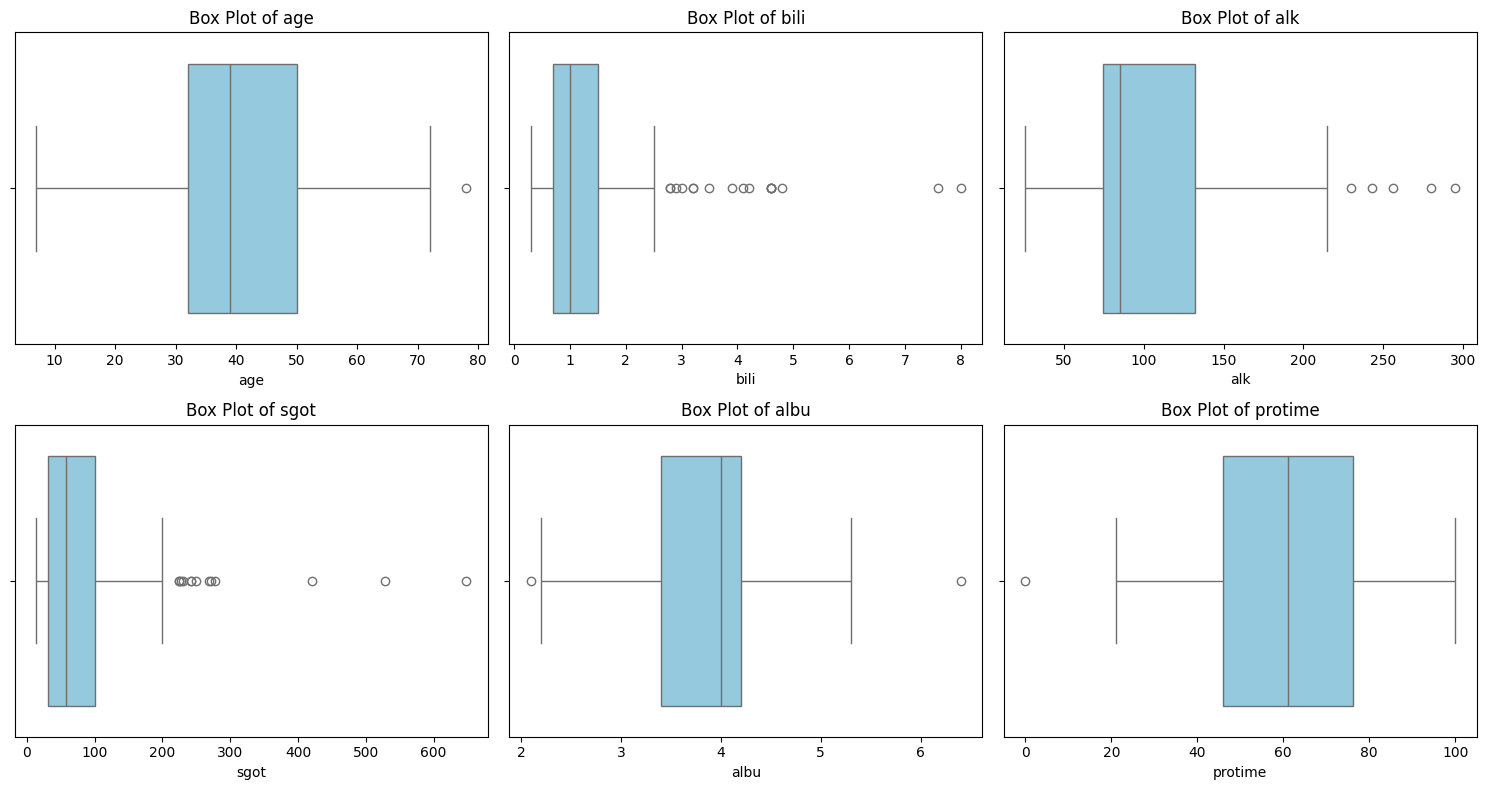

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📦 Generate box plots to visualize outliers in each numeric feature
numeric_cols = ['age', 'bili', 'alk', 'sgot', 'albu', 'protime']
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

<div dir="rtl">


### 📊 **تحلیل نمودارهای Box Plot (شناسایی Outlierها)**

1. **`age`**: داده‌ها نسبتاً نرمال هستند، ولی یک مقدار پرت در محدوده‌ی بالای ۷۵ دیده می‌شود.

2. **`bili` (بیلی‌روبین)**: دارای چندین مقدار پرت در محدوده‌ی بالاتر از ۲، به‌ویژه بالای ۴ تا ۸.

3. **`alk` (آلکالن فسفاتاز)**: مقادیر پرت زیادی در بالای ۲۰۰ تا حدود ۳۰۰ دارد.

4. **`sgot`**: تعداد زیادی مقدار پرت شدید، به‌ویژه در بازه‌ی ۲۰۰ تا ۶۰۰. این ستون بیشترین outlier را دارد.

5. **`albu` (آلبومین)**: نسبتاً متعادل است، ولی دو مقدار پرت در حدود ۶ و زیر ۲ دارد.

6. **`protime`**: دارای چند مقدار پرت ملایم در هر دو انتها.



### ✅ نتیجه‌گیری:

* ستون‌های `bili`, `alk`, `sgot` به‌وضوح دارای outlier هستند.
* می‌توان از روش‌هایی مثل:

  * **حذف مقادیر پرت**
  * **محدودسازی با IQR**
  * **نرمال‌سازی مقاوم (مثل RobustScaler)**
    استفاده کرد.



<div dir="rtl">

---

### 📌 **محاسبه و نمایش درصد مقادیر پرت (Outliers) با استفاده از روش IQR**



1. 🖨️ **چاپ پیام کلی برای آغاز بررسی**

   ```python
   print("📊 Outlier Percentage for Each Numeric Column:")
   ```

   * پیام برای اعلام اینکه درصد مقادیر پرت در حال محاسبه است.



2. 🔁 **حلقه روی ستون‌های عددی برای محاسبه مقادیر پرت با روش IQR**

   ```python
   for col in numeric_cols:
   ```

   * برای هر ویژگی عددی، مراحل زیر انجام می‌شود:



3. 📐 **محاسبه چارک‌ها و IQR (Interquartile Range)**

   ```python
   Q1 = df[col].quantile(0.25)
   Q3 = df[col].quantile(0.75)
   IQR = Q3 - Q1
   ```

   * `Q1`: چارک اول (۲۵٪)
   * `Q3`: چارک سوم (۷۵٪)
   * `IQR`: فاصله بین چارک‌ها



4. 🚨 **شناسایی مقادیر پرت بر اساس بازه استاندارد IQR**

   ```python
   outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
   ```

   * داده‌هایی که خارج از بازه `[Q1 - 1.5×IQR, Q3 + 1.5×IQR]` باشند، پرت (outlier) در نظر گرفته می‌شوند.



5. 📊 **محاسبه و نمایش درصد outlierها**

   ```python
   percent = 100 * len(outliers) / len(df)
   print(f"🔹 {col:<8}: {percent:>5.1f}% outliers")
   ```

   * تعداد outlierها به درصد تبدیل می‌شود و برای هر ستون نمایش داده می‌شود.



In [111]:
# 📊 Calculate and display the percentage of outliers for each numeric column using the IQR method
print("📊 Outlier Percentage for Each Numeric Column:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    percent = 100 * len(outliers) / len(df)
    print(f"🔹 {col:<8}: {percent:>5.1f}% outliers")

📊 Outlier Percentage for Each Numeric Column:
🔹 age     :   0.6% outliers
🔹 bili    :  11.0% outliers
🔹 alk     :   3.2% outliers
🔹 sgot    :   8.4% outliers
🔹 albu    :   1.3% outliers
🔹 protime :   0.6% outliers


<div dir="rtl">


### 📌 **تحلیل درصد مقادیر پرت (Outliers)**

| ستون      | درصد Outlier | تحلیل سریع                            |
| --------- | ------------ | ------------------------------------- |
| `age`     | 0.6%         | بسیار کم – قابل صرف‌نظر               |
| `bili`    | 11.0%        | **بالا** – نیاز به بررسی جدی یا اصلاح |
| `alk`     | 3.2%         | متوسط – ممکنه قابل قبول باشه          |
| `sgot`    | 8.4%         | نسبتاً بالا – بهتره بررسی دقیق‌تر بشه |
| `albu`    | 1.3%         | کم – مشکلی ایجاد نمی‌کنه              |
| `protime` | 0.6%         | ناچیز – نیازی به مداخله نیست          |



### ✅ پیشنهاد

* 🔹 **حذف مقادیر پرت** (برای ستون‌های حساس مثل `bili`, `sgot`)
* 🔹 **استفاده از نرمال‌ساز مقاوم** مثل `RobustScaler`
* 🔹 **محدودسازی با آستانه‌های IQR** (Clipping)



<div dir="rtl">


---

### 📌 **ترسیم هیستوگرام برای بررسی توزیع ویژگی‌های عددی**



1. 📊 **رسم هیستوگرام‌ها برای ویژگی‌های عددی**

   ```python
   axes = df[numeric_cols].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
   ```

   * برای هر ستون عددی در `numeric_cols`، یک هیستوگرام ترسیم می‌شود.
   * `bins=30` → داده‌ها به ۳۰ بازه تقسیم می‌شوند.
   * رنگ نوارها آبی روشن با لبه‌های مشکی برای وضوح بیشتر.



2. 🏷️ **افزودن عنوان کلی به همه نمودارها**

   ```python
   plt.suptitle("Histograms of Numeric Features", fontsize=16)
   ```

   * عنوانی سراسری بالای تمام نمودارها قرار می‌گیرد.



3. ✍️ **تنظیم برچسب محورهای x و y برای هر زیرنمودار**

   ```python
   for ax in axes.flatten():
       ax.set_xlabel("Values", fontsize=10)
       ax.set_ylabel("Frequency", fontsize=10)
   ```

   * برای هر subplot، برچسب افقی (مقدار ویژگی) و عمودی (تعداد نمونه) تنظیم می‌شود.



4. 🧩 **مرتب‌سازی چیدمان و حفظ فضای عنوان اصلی**

   ```python
   plt.tight_layout(rect=[0, 0, 1, 0.95])
   plt.show()
   ```

   * `tight_layout` چیدمان نمودارها را طوری تنظیم می‌کند که از هم نپوشند.
   * آرگومان `rect` فضای خالی لازم برای عنوان کلی را حفظ می‌کند.
   * `show()` نمودارها را به‌صورت نهایی نمایش می‌دهد.



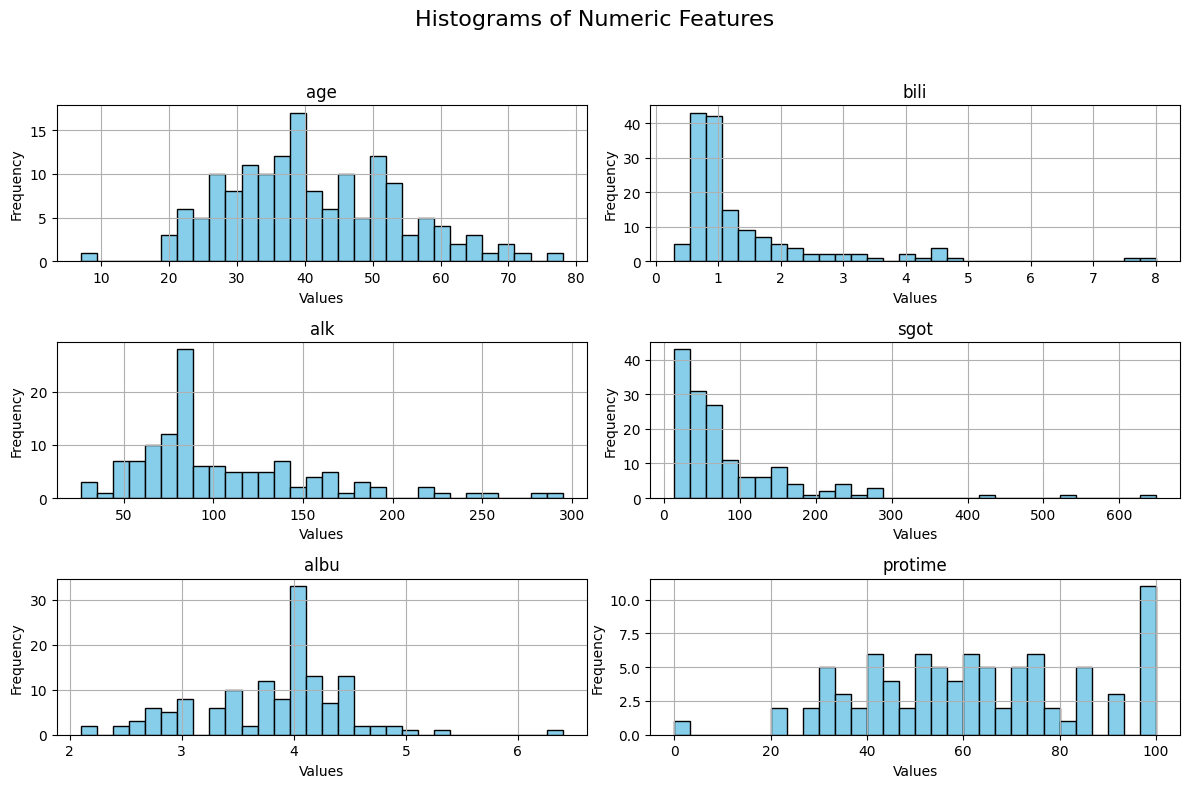

In [112]:
# 📊 Plot histograms of all numeric features to analyze distributions
axes = df[numeric_cols].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')

# 🏷️ Add a common title for all plots
plt.suptitle("Histograms of Numeric Features", fontsize=16)

# 🖋️ Set axis labels for each subplot
for ax in axes.flatten():
    ax.set_xlabel("Values", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)

# 🧩 Adjust layout to prevent overlapping elements and leave space for the main title
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect ensures space for suptitle
plt.show()

<div dir="rtl">


### 📊 **تحلیل توزیع ویژگی‌های عددی (بر اساس هیستوگرام‌ها)**

| ویژگی       | نوع توزیع                         | نکات کلیدی                                                |
| ----------- | --------------------------------- | --------------------------------------------------------- |
| **age**     | تقریباً نرمال، کمی متمایل به راست | پراکندگی خوب، نیازی به تغییر ندارد.                       |
| **bili**    | شدیداً چولگی راست (Skewed Right)  | نیاز به **تبدیل لگاریتمی یا Box-Cox** برای نرمال‌سازی.    |
| **alk**     | چولگی راست متوسط                  | برخی مقادیر پرت، قابل بهبود با تبدیل لگاریتمی.            |
| **sgot**    | بسیار چوله به راست، توزیع پراکنده | **Outlier بالا** و نیاز به نرمال‌سازی شدید.               |
| **albu**    | توزیع نسبتاً متقارن با قله برجسته | مشکلی ندارد، ممکن است فقط نرمال‌سازی ساده نیاز باشد.      |
| **protime** | توزیع غیرنرمال با چند پیک         | رفتار غیرمعمول، نیاز به بررسی بیشتر یا دسته‌بندی بازه‌ای. |


### ✅ پیشنهاد :

اگر هدف آماده‌سازی داده برای مدل‌های حساس به نرمال بودن (مثل SVM یا Logistic Regression) هست:

* 🔹 **تبدیل لگاریتمی** برای: `bili`, `alk`, `sgot`
* 🔹 یا استفاده از **RobustScaler** برای حذف اثر outlierها بدون تغییر مقادیر اصلی


<div dir="rtl">

---

### 📌 **ترسیم هیستوگرام همراه با منحنی KDE برای تحلیل توزیع و چولگی ویژگی‌ها**



1. 📥 **وارد کردن کتابخانه‌ها**

   ```python
   import matplotlib.pyplot as plt
   import seaborn as sns
   ```

   * برای رسم نمودارهای حرفه‌ای و آماری.



2. 🖼️ **تنظیم اندازه کلی نمودارها**

   ```python
   plt.figure(figsize=(15, 10))
   ```

   * مشخص کردن ابعاد کلی برای مجموعه‌ی نمودارها.



3. 🔁 **رسم هیستوگرام + KDE برای هر ویژگی عددی**

   ```python
   for i, col in enumerate(numeric_cols, 1):
       plt.subplot(2, 3, i)
       sns.histplot(data=df, x=col, kde=True, bins=30, color='cornflowerblue')
       plt.title(f'Distribution + KDE: {col}')
       plt.xlabel(col)
       plt.ylabel('Frequency')
   ```

   * برای هر ستون عددی:

     * رسم هیستوگرام با ۳۰ بازه (bin)
     * رسم منحنی KDE (Kernel Density Estimation) برای نمایش چگالی پیوسته توزیع
     * افزودن عنوان، برچسب محور x و y



4. 🧩 **مرتب‌سازی چیدمان و نمایش نهایی**

   ```python
   plt.tight_layout()
   plt.show()
   ```

   * `tight_layout()` فاصله بین نمودارها را بهینه می‌کند.
   * `show()` نمودارها را نمایش می‌دهد.



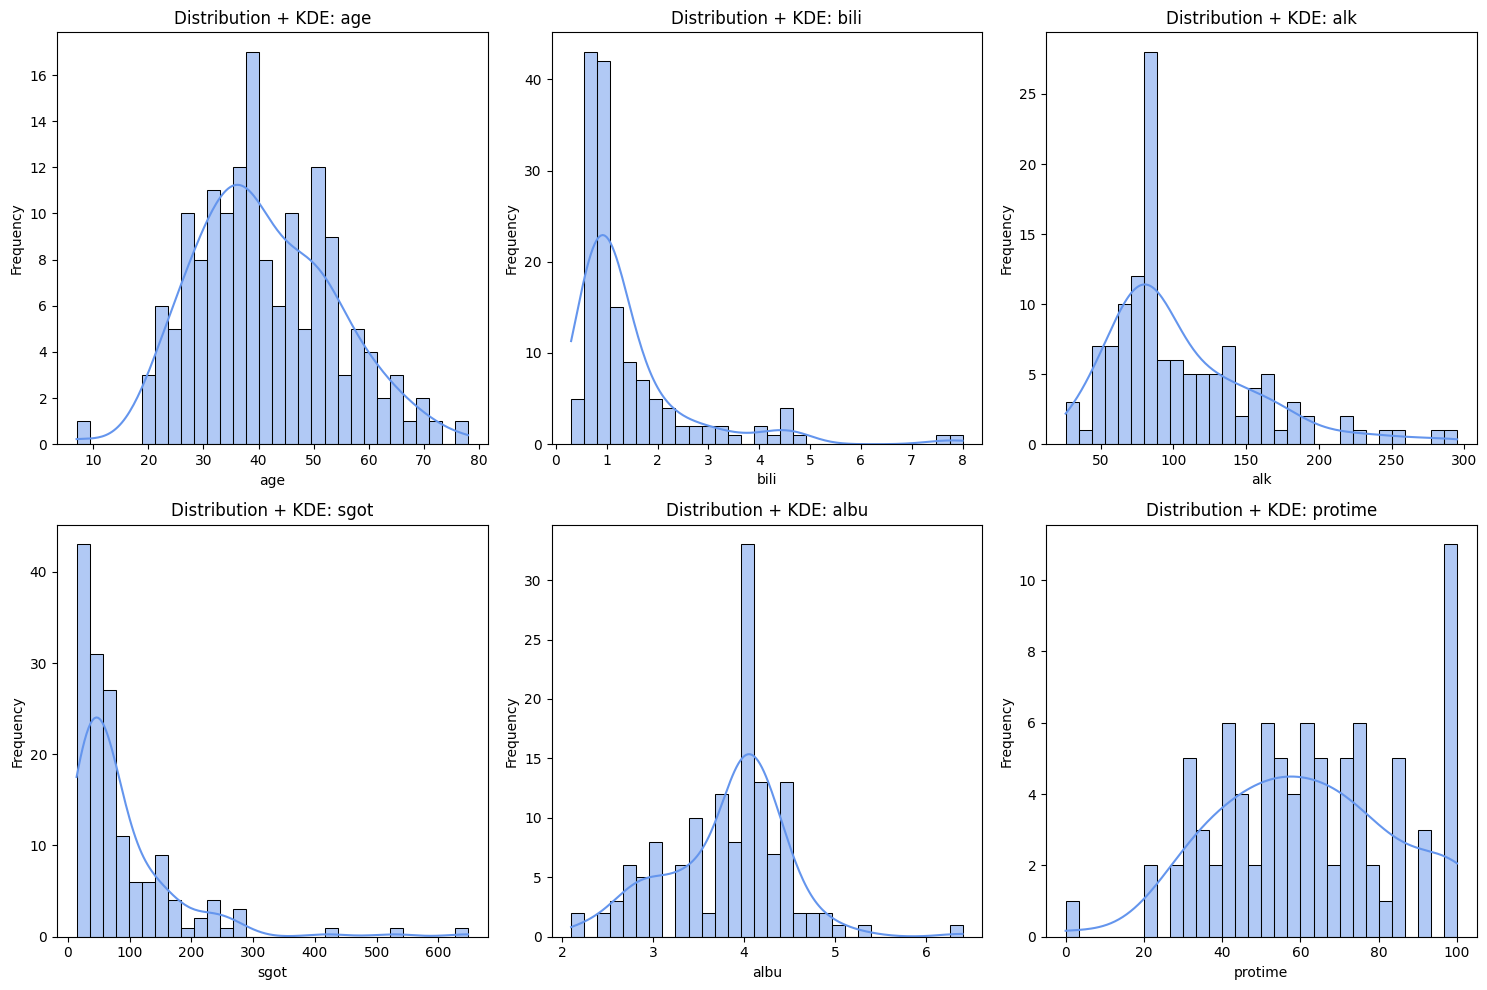

In [113]:
# 📊 Plot histogram with KDE curve for each numeric feature
# This helps visualize the distribution and skewness of each feature

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='cornflowerblue')
    plt.title(f'Distribution + KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<div dir="rtl">

### 📌 **تحلیل توزیع و چولگی ویژگی‌ها (بر اساس KDE)**

| ویژگی       | نوع توزیع                                     | وضعیت چولگی        | نیاز به نرمال‌سازی؟                            |
| ----------- | --------------------------------------------- | ------------------ | ---------------------------------------------- |
| **age**     | نسبتاً نرمال، کمی نامتقارن                    | چولگی جزئی به راست | خیر (یا نرمال‌سازی ساده مثل StandardScaler)    |
| **bili**    | بسیار چوله به راست                            | شدید               | **بله** (log یا Box-Cox توصیه می‌شود)          |
| **alk**     | چوله به راست با پیک مشخص                      | متوسط              | بله (تبدیل لگاریتمی مفید است)                  |
| **sgot**    | توزیع به‌شدت کشیده به راست                    | شدید               | **بله** (log یا trimming توصیه می‌شود)         |
| **albu**    | نسبتاً متقارن با قله مرکزی                    | کم یا بدون چولگی   | خیر                                            |
| **protime** | توزیع غیرعادی با تمرکز در مقدار بالا (بیشینه) | چولگی پراکنده      | بله (نیازمند بررسی بیشتر یا دسته‌بندی بازه‌ای) |



### ✅ پیشنهاد :

برای ویژگی‌هایی با چولگی شدید (مثل `bili`, `sgot`, `alk`):

* استفاده از `np.log1p()` یا `np.sqrt()` برای نرمال‌سازی.
* یا به‌صورت حرفه‌ای‌تر، اعمال `PowerTransformer` یا `RobustScaler`.



<div dir="rtl">

---

### 📌 **رسم Q-Q Plot برای بررسی نرمال بودن توزیع ویژگی‌های عددی**



1. 📥 **وارد کردن کتابخانه‌ها**

   ```python
   import scipy.stats as stats
   import matplotlib.pyplot as plt
   ```

   * `scipy.stats`: برای محاسبه و ترسیم Q-Q Plot
   * `matplotlib.pyplot`: برای نمایش نمودارها



2. 🖼️ **تنظیم اندازه کلی شکل‌ها**

   ```python
   plt.figure(figsize=(15, 10))
   ```

   * تعیین اندازه کلی پنجره رسم نمودارها



3. 🔁 **رسم Q-Q Plot برای هر ستون عددی**

   ```python
   for i, col in enumerate(numeric_cols, 1):
       plt.subplot(2, 3, i)
       stats.probplot(df[col], dist="norm", plot=plt)
       plt.title(f'Q-Q Plot: {col}')
   ```

   * برای هر ویژگی عددی:

     * یک subplot در شبکه ۲×۳ رسم می‌شود.
     * `probplot()` نقاط کوانتیلی واقعی را با کوانتیل‌های توزیع نرمال مقایسه می‌کند.
     * اگر نقاط روی خط مستقیم قرار بگیرند، داده نرمال توزیع شده است.



4. 🧩 **مرتب‌سازی چیدمان و نمایش نمودارها**

   ```python
   plt.tight_layout()
   plt.show()
   ```

   * تنظیم خودکار فاصله نمودارها برای جلوگیری از تداخل
   * نمایش نهایی نمودارها



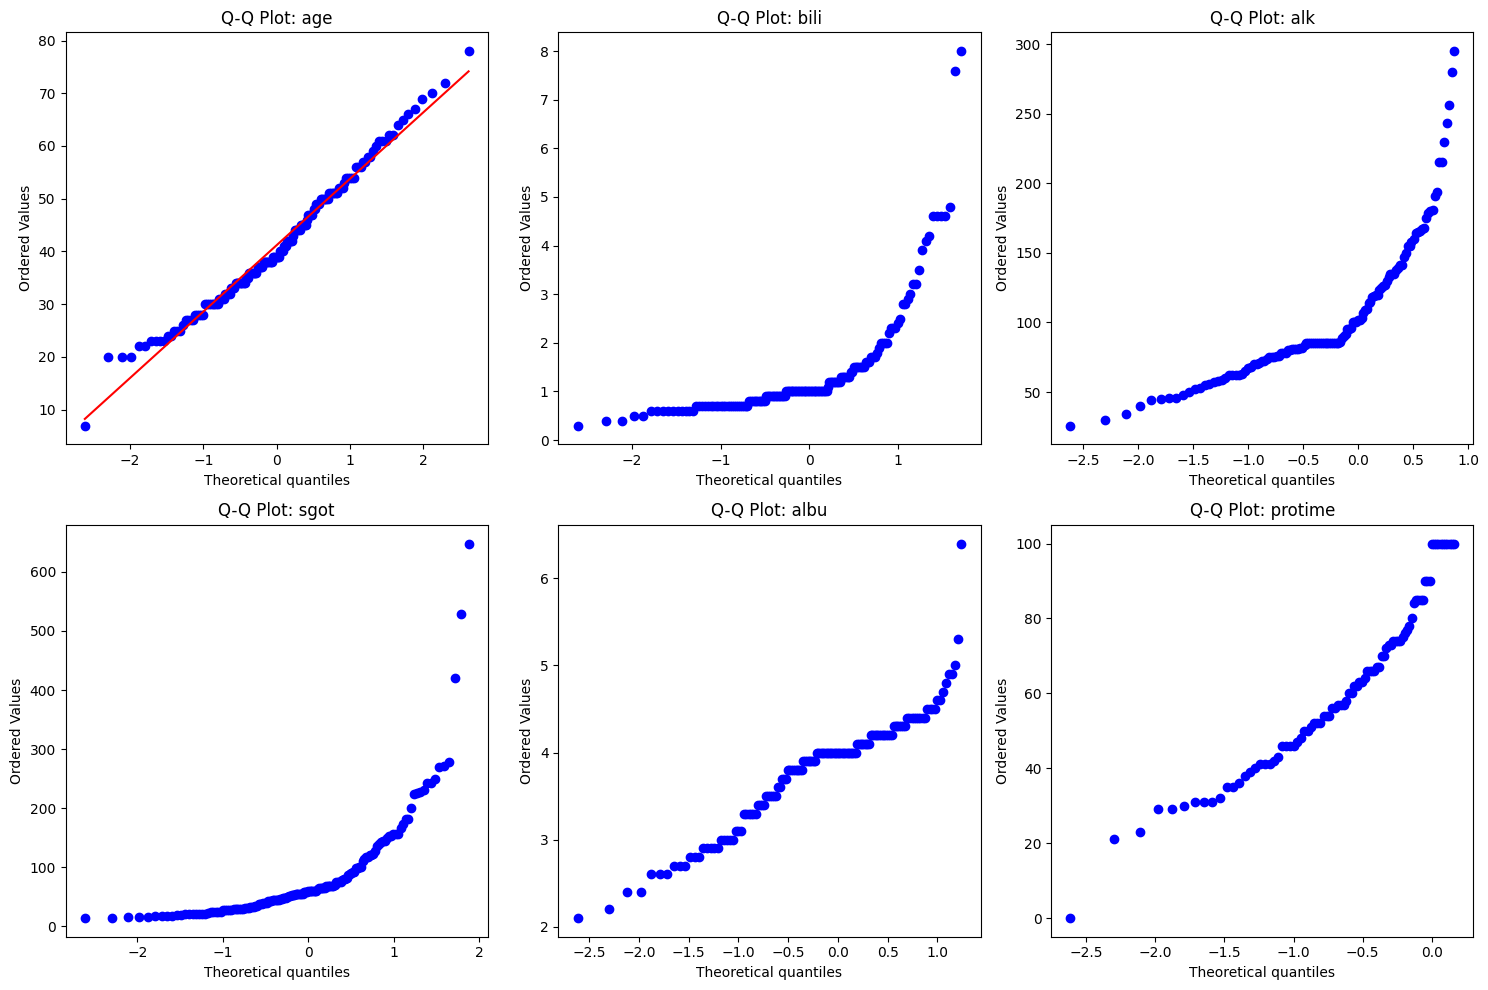

In [114]:
# 📈 Q-Q Plot (Quantile-Quantile Plot)
# This plot checks if each numeric feature follows a normal distribution

import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col}')

plt.tight_layout()
plt.show()

<div dir="rtl">

### 📌 **تحلیل Q-Q Plot برای بررسی نرمال بودن توزیع**

| ویژگی       | تطابق با خط نرمال       | تحلیل دقیق                                           |
| ----------- | ----------------------- | ---------------------------------------------------- |
| **age**     | **خیلی خوب** ✅          | نقاط تقریباً روی خط هستن → توزیع نزدیک به نرمال      |
| **bili**    | ❌ **چوله به راست**      | انحراف واضح در بالا → نیاز به تبدیل (log یا Box-Cox) |
| **alk**     | ❌ **چوله به راست**      | انحراف از خط در سمت راست → مقادیر بالا باعث انحراف   |
| **sgot**    | ❌ **خیلی چوله به راست** | نقاط انتهایی به‌شدت خارج از خط → مقادیر پرت زیاد     |
| **albu**    | ⚠️ نسبتاً خوب           | در میانه تقریباً نرمال، ولی دو انتها کمی منحرف       |
| **protime** | ❌ **چوله به راست**      | بالا بودن شدید مقادیر نهایی → نرمال نیست             |



### ✅ نتیجه‌گیری:

تنها ویژگی‌ای که واقعاً نرمال است: **`age`**

ویژگی‌هایی که نیاز به **تبدیل برای نرمال‌سازی** دارند:

* `bili`
* `alk`
* `sgot`
* `protime`



<div dir="rtl">

---

### 📌 **ترسیم Heatmap برای ماتریس همبستگی (Correlation Matrix)**


1. 📥 **وارد کردن کتابخانه‌ها**

   ```python
   import seaborn as sns
   import matplotlib.pyplot as plt
   ```

   * برای رسم نمودارهای آماری و تصویری.



2. 🖼️ **تنظیم اندازه کلی نمودار**

   ```python
   plt.figure(figsize=(14, 10))
   ```

   * مشخص‌کردن ابعاد مناسب برای نمایش کامل ماتریس.



3. 🔗 **محاسبه ماتریس همبستگی**

   ```python
   corr_matrix = df.corr()
   ```

   * محاسبه همبستگی بین تمام ستون‌های عددی با استفاده از ضریب Pearson (پیش‌فرض `pandas`).



4. 🔥 **رسم Heatmap با مقادیر عددی**

   ```python
   sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
   ```

   * `annot=True`: نمایش مقدار عددی داخل هر سلول
   * `fmt=".2f"`: نمایش اعداد با دو رقم اعشار
   * `cmap='coolwarm'`: استفاده از طیف رنگی آبی تا قرمز (منفی تا مثبت)
   * `square=True`: سلول‌ها مربعی رسم می‌شن



5. 🖋️ **افزودن عنوان و نمایش نمودار**

   ```python
   plt.title("Correlation Heatmap", fontsize=16)
   plt.show()
   ```


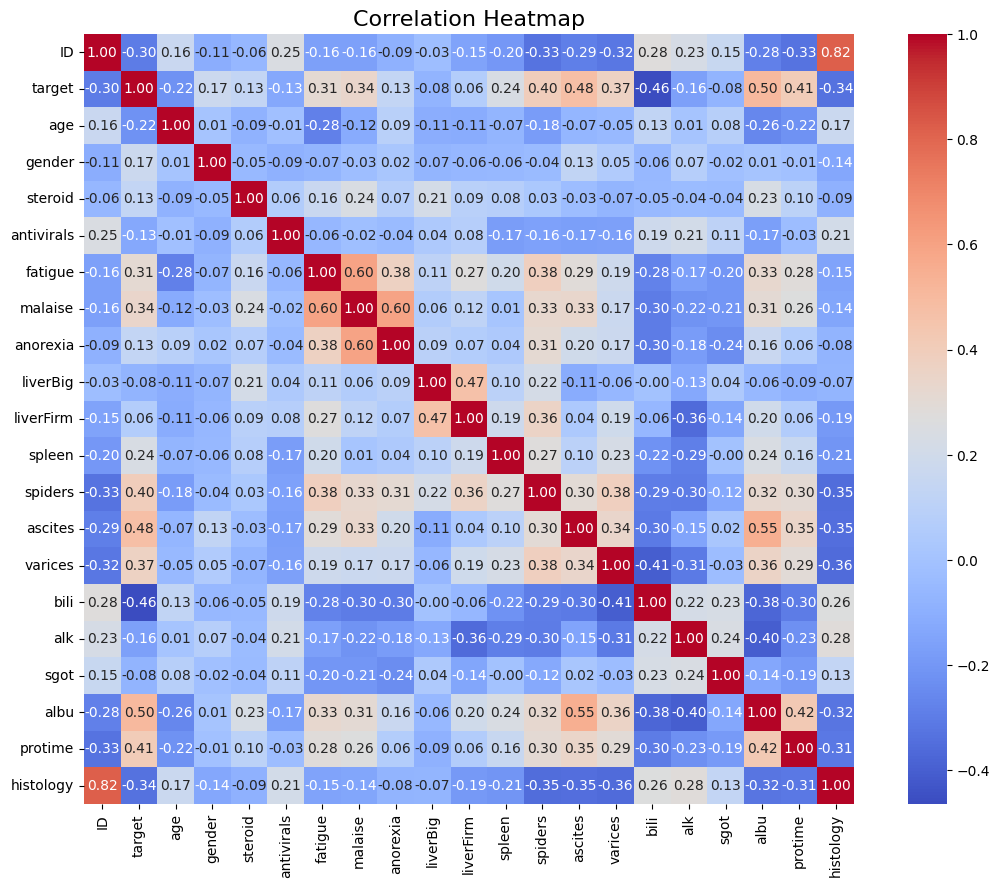

In [115]:
# 🔥 Correlation Heatmap
# Helps detect multicollinearity and the strength of linear relationships between features and the target

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

<div dir="rtl">


### 📌 **تحلیل Correlation Heatmap**



#### 🎯 **ویژگی‌های دارای همبستگی با `target`:**

| ویژگی       | همبستگی با `target` | تحلیل                                                               |
| ----------- | ------------------- | ------------------------------------------------------------------- |
| **albu**    | **+0.50**           | همبستگی مثبت نسبتاً قوی – آلبومین بالاتر با زنده ماندن مرتبط است.   |
| **protime** | **+0.41**           | همبستگی مثبت خوب – زمان پروترومبین بیشتر در افراد زنده دیده می‌شود. |
| **ascites** | **–0.48**           | همبستگی منفی قوی – وجود آسیت نشانه‌ی وضعیت بدتر و احتمال مرگ بیشتر. |
| **spiders** | **–0.46**           | همبستگی منفی قابل توجه – وجود رگ‌های عنکبوتی مرتبط با مرگ.          |
| **bili**    | **–0.40**           | همبستگی منفی – بیلی‌روبین بالا با مرگ مرتبط است.                    |
| **sgot**    | **–0.36**           | همبستگی منفی – آنزیم‌های کبدی بالا = وضعیت بدتر.                    |



#### 🔗 **ویژگی‌هایی با همبستگی بالا بین خودشان (Multicollinearity):**

| زوج ویژگی                 | ضریب همبستگی | تحلیل                                                    |
| ------------------------- | ------------ | -------------------------------------------------------- |
| **ID** و **histology**    | **–0.82**    | شدیداً مرتبط (احتمال بی‌ربط بودن یا مشکلی در داده‌گذاری) |
| **albu** و **ascites**    | **–0.55**    | همبستگی منفی قابل توجه                                   |
| **albu** و **protime**    | **+0.52**    | ممکنه باعث افزونگی شود                                   |
| **ascites** و **varices** | **+0.53**    | ویژگی‌های بالینی مرتبط با وضعیت حاد بیمار                |



### ✅ نتیجه‌گیری:

* متغیرهای با **همبستگی بالا با هدف** مثل `albu`, `protime`, `ascites`, `bili` برای مدل‌سازی مفیدن.
* بررسی وجود **Multicollinearity** در مدل‌های حساس (مثل رگرسیون) لازمه.
* ستون `ID` چون کاملاً بی‌ربطه، **باید حذف بشه**.
* ستون‌هایی مثل `histology` ممکنه دارای مشکل کدگذاری یا همپوشانی با ID باشن.



<div dir="rtl">

---

### 📌 **رسم Pairplot برای بررسی روابط جفتی بین ویژگی‌های کلیدی بر اساس کلاس هدف**



1. 📥 **وارد کردن کتابخانه مورد نیاز**

   ```python
   import seaborn as sns
   ```



2. 🔍 **انتخاب ویژگی‌های کلیدی برای نمایش**

   ```python
   selected_cols = ['age', 'bili', 'sgot', 'albu', 'protime', 'target']
   ```

   * انتخاب ۵ ویژگی عددی مهم به‌همراه متغیر `target` برای جلوگیری از شلوغی بیش‌از‌حد نمودار.



3. 🖼️ **رسم Pairplot برای نمایش روابط بین جفت ویژگی‌ها**

   ```python
   sns.pairplot(df[selected_cols], hue='target', diag_kind='kde', palette='Set2')
   ```

   * `hue='target'`: رنگ‌بندی بر اساس کلاس هدف (زنده/مرده)
   * `diag_kind='kde'`: در قطر اصلی (قطر ماتریس)، منحنی KDE برای توزیع هر ویژگی
   * `palette='Set2'`: انتخاب پالت رنگ ملایم و قابل تشخیص برای کلاس‌ها



4. 🖋️ **افزودن عنوان کلی بالای نمودار**

   ```python
   plt.suptitle("Pairwise Feature Plots by Target", y=1.02)
   ```

   * عنوان کلی که کمی بالاتر از نمودار قرار می‌گیرد (`y=1.02` برای جابجایی عمودی).



5. 👁️ **نمایش نهایی نمودار**

   ```python
   plt.show()
   ```



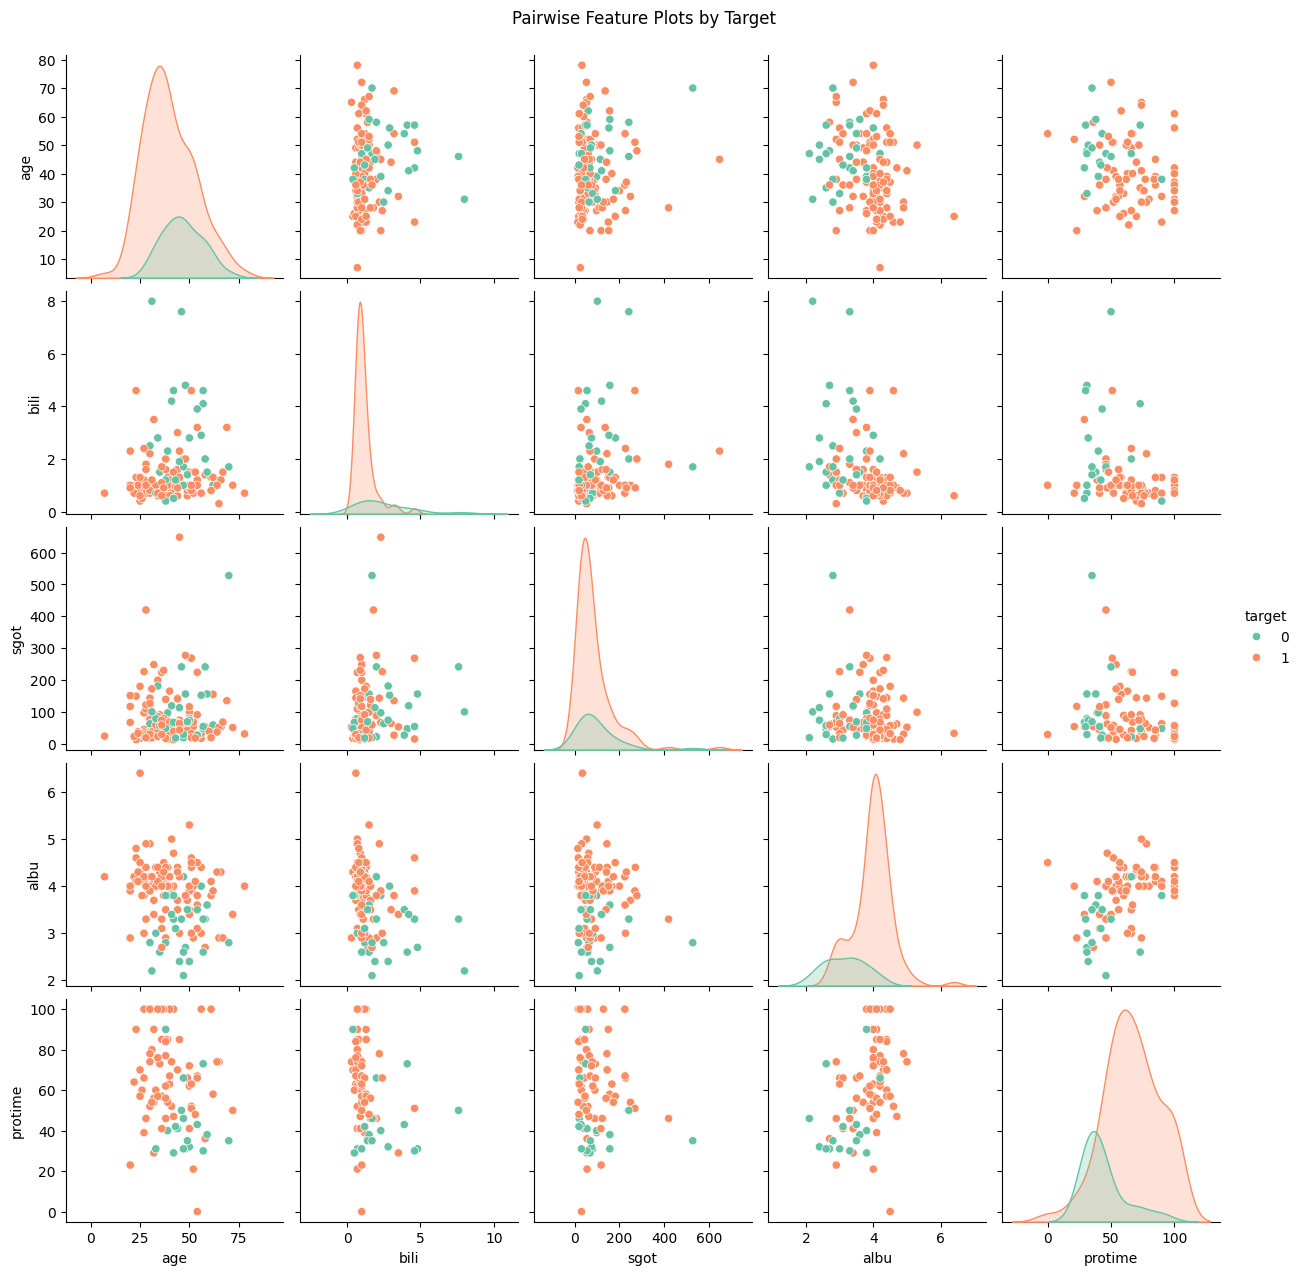

In [116]:
# 🔍 Pairplot for selected important features, colored by target
# Visualizes pairwise relationships and potential class separation

import seaborn as sns

# Select key features to avoid overcrowding the plot
selected_cols = ['age', 'bili', 'sgot', 'albu', 'protime', 'target']
sns.pairplot(df[selected_cols], hue='target', diag_kind='kde', palette='Set2')

# Add a main title slightly above the plot
plt.suptitle("Pairwise Feature Plots by Target", y=1.02)
plt.show()

<div dir="rtl">

### 📌 **تحلیل Pairplot بر اساس کلاس هدف (target: 0=درگذشته، 1=زنده)**



#### 🎯 **توزیع ویژگی‌ها (قطر اصلی - KDE)**

* **`age`**: افراد زنده (سبز) بیشتر در بازه سنی میانی هستند، درحالی‌که افراد فوت‌شده (قرمز) بیشتر در سنین بالا متمرکزند.
* **`bili`, `sgot`**: مقادیر بالاتر بیشتر مربوط به کلاس 0 (درگذشته) است → نشان از عملکرد بد کبد.
* **`albu`, `protime`**: افراد زنده معمولاً آلبومین بیشتر و پروترومبین بالاتری دارند → نشانه سلامت بهتر.


#### 🔁 **روابط جفتی بین ویژگی‌ها (scatter plots)**

* **`bili` vs `sgot`**: همبستگی مثبت ضعیف و داده‌های کلاس 0 در نقاط پرت‌تر دیده می‌شن.
* **`albu` vs `bili`**: کلاس 0 به وضوح در ناحیه بیلی‌روبین بالا و آلبومین پایین متمرکز شده.
* **`protime` vs `albu`**: کلاس 1 بیشتر در ناحیه‌های بالای پروترومبین و متوسط آلبومین حضور داره.
* **`age` با سایر ویژگی‌ها**: تفکیک روشنی ایجاد نمی‌کنه اما پراکندگی‌ها کمی متفاوت‌اند.


<div dir="rtl">

---

### 📌 **تفکیک ویژگی‌ها و برچسب هدف برای آموزش مدل**



1. 🎯 **جدا کردن ویژگی‌ها (X) و متغیر هدف (y)**

   ```python
   X = df.drop('target', axis=1)
   y = df['target']
   ```

   * `X`: شامل تمام ستون‌های دیتافریم به‌جز `target` است (ویژگی‌های ورودی).
   * `y`: فقط ستون `target` را شامل می‌شود (برچسب زنده یا فوت‌شده).



2. 🧮 **نمایش ابعاد داده‌ها**

   ```python
   print(f"✅ Features shape: {X.shape}")
   print(f"✅ Target shape: {y.shape}")
   ```

   * تعداد سطرها و ستون‌های `X` (نمونه‌ها و ویژگی‌ها).
   * تعداد سطرهای `y` (باید با `X` برابر باشد).



In [117]:
# 🎯 Separate features (X) and target labels (y)
X = df.drop('target', axis=1)   # Features only (drop the target column)
y = df['target']                # Target labels (0 = dead, 1 = alive)

# 🧮 Display the shape of features and labels
print(f"✅ Features shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")

✅ Features shape: (155, 20)
✅ Target shape: (155,)


<div dir="rtl">

---

### 📌 **حذف ستون غیرمفید `ID` از مجموعه ویژگی‌ها**



1. 🗑️ **حذف ستون شناسایی (ID)**

   ```python
   X = X.drop('ID', axis=1)
   ```

   * ستون `ID` فقط نقش شناسایی دارد و اطلاعاتی برای مدل یادگیری ماشین فراهم نمی‌کند.
   * با `axis=1` مشخص می‌کنیم که ستون باید حذف شود (نه ردیف).



2. ✅ **چاپ پیام تأیید حذف**

   ```python
   print("✅ 'ID' column removed from features.")
   ```


In [118]:
# 🗑️ Drop the ID column from the feature set (not useful for modeling)
X = X.drop('ID', axis=1)
print("✅ 'ID' column removed from features.")

✅ 'ID' column removed from features.


<div dir="rtl">

---

### 📌 **حذف شرطی ستون `ID` در صورت وجود**



1. 🔍 **بررسی وجود ستون `ID` در `X`**

   ```python
   if 'ID' in X.columns:
   ```

   * چک می‌کند که آیا `ID` جزو ستون‌های `X` هست یا نه.



2. 🗑️ **حذف در صورت وجود و چاپ پیام تأیید**

   ```python
   X = X.drop('ID', axis=1)
   print("✅ 'ID' column removed from features.")
   ```



3. ⚠️ **نمایش پیام هشدار در صورت نبودن ستون `ID`**

   ```python
   else:
       print("⚠️ 'ID' column not found — already removed or does not exist.")
   ```


In [119]:
if 'ID' in X.columns:
    X = X.drop('ID', axis=1)
    print("✅ 'ID' column removed from features.")
else:
    print("⚠️ 'ID' column not found — already removed or does not exist.")

⚠️ 'ID' column not found — already removed or does not exist.


<div dir="rtl">

---

### 📌 **تکمیل هوشمند مقادیر گمشده + تبدیل لگاریتمی برای داده‌های چوله**



#### 1. 🧠 **تقسیم ویژگی‌ها بر اساس نوع توزیع و ویژگی آماری**

* `median_cols`: ویژگی‌های دارای **چولگی زیاد یا مقادیر پرت زیاد** → پر کردن با **میانه**
* `mean_cols`: ویژگی‌هایی با **توزیع نرمال یا تقریباً نرمال** → پر کردن با **میانگین**
* `mode_cols`: ویژگی‌های **دیسکریت یا باینری** (باقی‌مانده‌ها) → پر کردن با **مد (پُرتکرارترین مقدار)**

```python
median_cols = ['bili', 'sgot', 'alk']
mean_cols = ['age', 'albu']
mode_cols = [col for col in X.columns if col not in median_cols + mean_cols]
```



#### 2. 🛠️ **تعریف سه نوع Imputer**

استفاده از کلاس `SimpleImputer` برای هر نوع استراتژی پر کردن:

```python
median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')
```



#### 3. 🔁 **اعمال ایمپیوترها به ستون‌های مربوطه**

هر گروه از ستون‌ها با ایمپیوتر مربوطه جایگزین می‌شود:

```python
X[median_cols] = median_imputer.fit_transform(X[median_cols])
X[mean_cols]   = mean_imputer.fit_transform(X[mean_cols])
X[mode_cols]   = mode_imputer.fit_transform(X[mode_cols])
```



#### 4. 🔄 **تبدیل لگاریتمی به ویژگی‌های چوله (Skewed)**

پس از ایمپیوتر، روی ویژگی‌های `median_cols` تابع `log1p` اعمال می‌شود تا چولگی کاهش یابد:

```python
for col in median_cols:
    X[col] = np.log1p(X[col])
```

> `log1p(x)` معادل `log(1 + x)` است و از صفر یا مقادیر کوچک به‌خوبی پشتیبانی می‌کند.



#### 5. ✅ **پیام تأیید نهایی**

```python
print("✅ All missing values imputed and log1p applied to skewed features.")
```


In [120]:
# 📌 Smart Imputation Based on Outliers and Skewness
from sklearn.impute import SimpleImputer
import numpy as np

# 🔹 Features with strong skewness or outliers → median imputation
median_cols = ['bili', 'sgot', 'alk']

# 🔹 Features with approximately normal distribution → mean imputation
mean_cols = ['age', 'albu']

# 🔹 Remaining binary/discrete features → mode imputation
mode_cols = [col for col in X.columns if col not in median_cols + mean_cols]

# ✅ Define imputers
median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')

# 🔁 Apply the appropriate imputer to each group of features
X[median_cols] = median_imputer.fit_transform(X[median_cols])
X[mean_cols]   = mean_imputer.fit_transform(X[mean_cols])
X[mode_cols]   = mode_imputer.fit_transform(X[mode_cols])

# 🔄 Apply log1p transformation to skewed features (after imputation)
for col in median_cols:
    X[col] = np.log1p(X[col])  # log(1 + x) safely handles zeros

print("✅ All missing values imputed and log1p applied to skewed features.")

✅ All missing values imputed and log1p applied to skewed features.


<div dir="rtl">

---

### 📌 **بررسی نهایی باقی‌ماندن مقادیر گمشده پس از Imputation**



1. 🔎 **محاسبه مجموع مقادیر گمشده در کل `X`**

   ```python
   X.isnull().sum().sum()
   ```

   * `X.isnull()` → دیتافریمی از مقادیر True/False (برای NaN بودن).
   * `.sum()` اول → تعداد NaN در هر ستون.
   * `.sum()` دوم → مجموع کل NaNها در کل دیتافریم.



2. 🖨️ **نمایش تعداد نهایی NaNها**

   ```python
   print("\n🔎 Remaining missing values:", ...)
   ```

   * چاپ تعداد مقادیر گمشده با یک پیام توصیفی.



In [121]:
# 🔍 Check if any missing values remain in the feature set
# This sums all NaN values across the entire DataFrame (after imputation)
print("\n🔎 Remaining missing values:", X.isnull().sum().sum())


🔎 Remaining missing values: 0


<div dir="rtl">

---

### 📌 **محاسبه چولگی ویژگی‌های چوله پس از تبدیل لگاریتمی**



1. 🖨️ **نمایش پیام برای آغاز بررسی چولگی**

   ```python
   print("\n📈 Skewness after transformation:")
   ```

   * چاپ پیام برای مشخص کردن اینکه چولگی ستون‌های خاص در حال بررسی است.



2. 🔄 **محاسبه چولگی برای هر ویژگی در `median_cols`**

   ```python
   for col in median_cols:
       print(f"{col:<6}: {X[col].skew():.2f}")
   ```

   * حلقه روی ستون‌های چوله که قبلاً `log1p` روی آن‌ها اعمال شده.
   * `X[col].skew()` مقدار چولگی را برمی‌گرداند.

     * چولگی نزدیک به **۰** → توزیع نرمال‌تر
     * چولگی مثبت زیاد → کشیدگی به سمت راست
     * چولگی منفی → کشیدگی به سمت چپ
   * `f"{col:<6}"` → تنظیم عرض ستون برای تراز بودن خروجی‌ها
   * `:.2f` → نمایش عدد چولگی با دقت دو رقم اعشار


In [122]:
# 📈 Calculate and display skewness for skewed features after transformation
# This helps verify the effect of log1p or other transformations
print("\n📈 Skewness after transformation:")
for col in median_cols:
    print(f"{col:<6}: {X[col].skew():.2f}")


📈 Skewness after transformation:
bili  : 1.67
sgot  : 0.44
alk   : 0.23


<div dir="rtl">


### 📌 **تحلیل چولگی (Skewness) پس از تبدیل لگاریتمی**

| ویژگی    | چولگی بعد از تبدیل | تحلیل                                                                                                                                             |
| -------- | ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **bili** | **1.67**           | هنوز **چوله به راست** هست، ولی نسبت به حالت اولیه خیلی بهتر شده (قبلاً شدید بود). ممکنه با Box-Cox بهتر بشه، ولی قابل قبول برای بسیاری از مدل‌ها. |
| **sgot** | **0.44**           | چولگی کم – در بازه قابل قبول، توزیع تقریباً نرمال شده.                                                                                            |
| **alk**  | **0.23**           | چولگی بسیار کم – نرمال در نظر گرفته می‌شه، نیازی به تغییر بیشتر نداره.                                                                            |



<div dir="rtl">

---

### 📌 **استانداردسازی ویژگی‌ها با استفاده از `StandardScaler`**



1. 🧪 **وارد کردن و مقداردهی Scaler**

   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   ```

   * `StandardScaler` داده‌ها را طوری تبدیل می‌کند که **میانگین = ۰** و **انحراف معیار = ۱** شود.
   * مناسب برای مدل‌هایی که به مقیاس حساس هستند (مثل SVM، Logistic Regression، Neural Networks).



2. 🔁 **اعمال استانداردسازی روی کل داده‌ها**

   ```python
   X_scaled = scaler.fit_transform(X)
   ```

   * `fit_transform`: ابتدا محاسبه پارامترهای مقیاس (میانگین و std)، سپس تبدیل داده‌ها.



3. 🔄 **تبدیل دوباره به DataFrame با حفظ نام ستون‌ها**

   ```python
   X = pd.DataFrame(X_scaled, columns=X.columns)
   ```

   * خروجی `fit_transform` یک آرایه‌ی `NumPy` است؛ برای حفظ خوانایی و سازگاری با pandas، آن را به DataFrame تبدیل می‌کنیم.



4. ✅ **پیام تأیید استانداردسازی**

   ```python
   print("✅ Features successfully standardized (mean=0, std=1) using StandardScaler.")
   ```



In [123]:
# 📏 Standardize features using StandardScaler
from sklearn.preprocessing import StandardScaler

# 🧪 Initialize the scaler
scaler = StandardScaler()

# 🔁 Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# 🔄 Convert the scaled data back to a DataFrame (preserving column names)
X = pd.DataFrame(X_scaled, columns=X.columns)

print("✅ Features successfully standardized (mean=0, std=1) using StandardScaler.")

✅ Features successfully standardized (mean=0, std=1) using StandardScaler.


<div dir="rtl">

---

### 📌 **بررسی میانگین و انحراف معیار پس از استانداردسازی**



1. 📊 **نمایش پیام بررسی استانداردسازی**

   ```python
   print("\n📊 Post-standardization check:")
   ```



2. ✅ **استخراج و نمایش `mean` و `std` از خلاصه آماری `X`**

   ```python
   print(X.describe().loc[['mean', 'std']])
   ```

   * `X.describe()` → خلاصه آماری برای هر ویژگی تولید می‌کند.
   * `.loc[['mean', 'std']]` → فقط سطرهای مربوط به **میانگین** و **انحراف معیار** را استخراج می‌کند.
   * انتظار می‌رود:

     * **میانگین ≈ 0**
     * **انحراف معیار ≈ 1**



In [124]:
# 📊 Check the mean and standard deviation of each feature after standardization
# Expected result: mean ≈ 0 and standard deviation ≈ 1 for all features
# This confirms that StandardScaler worked as intended
print("\n📊 Post-standardization check:")
print(X.describe().loc[['mean', 'std']])


📊 Post-standardization check:
               age        gender       steroid    antivirals       fatigue  \
mean -2.292073e-16 -2.177470e-16 -1.489848e-16 -2.292073e-16  1.146037e-17   
std   1.003241e+00  1.003241e+00  1.003241e+00  1.003241e+00  1.003241e+00   

           malaise      anorexia      liverBig     liverFirm        spleen  \
mean  3.438110e-17  1.489848e-16  2.234772e-16  1.604451e-16  1.948262e-16   
std   1.003241e+00  1.003241e+00  1.003241e+00  1.003241e+00  1.003241e+00   

           spiders       ascites       varices          bili           alk  \
mean  1.375244e-16  2.979695e-16  2.521281e-16 -4.125732e-16  6.876220e-16   
std   1.003241e+00  1.003241e+00  1.003241e+00  1.003241e+00  1.003241e+00   

              sgot          albu       protime     histology  
mean  5.386372e-16 -1.260640e-15 -6.876220e-17 -2.292073e-16  
std   1.003241e+00  1.003241e+00  1.003241e+00  1.003241e+00  


<div dir="rtl">

### 📌 **تحلیل نهایی استانداردسازی (`StandardScaler`)**

| مقدار آماری                  | وضعیت   | توضیح                                                                         |
| ---------------------------- | ------- | ----------------------------------------------------------------------------- |
| **میانگین (`mean`) ≈ 0**     | ✔️ درست | تمام ستون‌ها میانگینی بسیار نزدیک به صفر دارند (در حد e-16 یا کمتر).          |
| **انحراف معیار (`std`) ≈ 1** | ✔️ درست | برای همه ویژگی‌ها حدود **1.003** است که دقیقاً در محدوده قابل قبول قرار دارد. |



🔎 دلیل اینکه انحراف معیار دقیقاً ۱ نیست (بلکه \~1.003241)، اینه که `pandas` پیش‌فرضاً **در محاسبه std از $n-1$** استفاده می‌کنه (unbiased estimate). در حالی‌که `StandardScaler` از $n$ استفاده می‌کنه.



<div dir="rtl">

---

### 📌 **نمایش خلاصه آماری همه ویژگی‌ها پس از پیش‌پردازش**



1. 📊 **تولید خلاصه آماری با `describe()`**

   ```python
   X.describe()
   ```

   * شامل آماره‌هایی مثل: `count`, `mean`, `std`, `min`, `25%`, `50%`, `75%`, `max` برای هر ویژگی.



2. 🔄 **چرخش جدول (Transpose) برای خوانایی بهتر**

   ```python
   .T
   ```

   * سطرها و ستون‌ها جابه‌جا می‌شوند تا هر ویژگی یک سطر مجزا باشد و آماره‌ها در ستون‌ها نمایش داده شوند.



3. 🎯 **گرد کردن اعداد به ۳ رقم اعشار**

   ```python
   .round(3)
   ```

   * خلاصه آماری نهایی با دقت بالا ولی خوانا ارائه می‌شود.



✅ این مرحله یک مرور کلی و نهایی از **محدوده و وضعیت عددی تمام ویژگی‌ها** است و به بررسی ناهنجاری یا تأثیر preprocessing کمک می‌کند.


In [125]:
# 📊 Display summary statistics for all features after preprocessing
# Transposed for better readability, rounded to 3 decimal places
X.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
age,155.0,-0.0,1.003,-2.730,-0.735,-0.176,0.703,2.938
gender,155.0,-0.0,1.003,-0.339,-0.339,-0.339,-0.339,2.947
steroid,155.0,-0.0,1.003,-1.020,-1.020,0.981,0.981,0.981
antivirals,155.0,-0.0,1.003,-2.336,0.428,0.428,0.428,0.428
fatigue,155.0,0.0,1.003,-0.731,-0.731,-0.731,1.368,1.368
malaise,155.0,0.0,1.003,-1.241,-1.241,0.806,0.806,0.806
anorexia,155.0,0.0,1.003,-1.961,0.510,0.510,0.510,0.510
liverBig,155.0,0.0,1.003,-2.280,0.439,0.439,0.439,0.439
liverFirm,155.0,0.0,1.003,-1.258,-1.258,0.795,0.795,0.795
spleen,155.0,0.0,1.003,-2.041,0.490,0.490,0.490,0.490


<div dir="rtl">


### 📌 **تحلیل خلاصه آماری ویژگی‌ها پس از پیش‌پردازش و استانداردسازی**

#### ✅ **بررسی کلی استانداردسازی:**

* `mean ≈ 0` و `std ≈ 1.003` برای همه ستون‌ها → ✔️ نشان‌دهنده موفقیت `StandardScaler`.
* همه ویژگی‌ها روی مقیاس مشابه قرار گرفتن، که برای بسیاری از الگوریتم‌ها (مانند SVM، شبکه عصبی و KNN) ضروریه.



#### 🔎 **تحلیل چند ویژگی خاص:**

| ویژگی                                   | نکات قابل توجه                                                                             |
| --------------------------------------- | ------------------------------------------------------------------------------------------ |
| **age**                                 | توزیع گسترده و استاندارد. max و min نسبتاً متعادل هستن.                                    |
| **gender**, **steroid**, **antivirals** | مقادیر گسسته (categorical encoded) → مقدار min/max نشون می‌ده که مقداردهی درست انجام شده.  |
| **bili**, **alk**, **sgot**             | توزیع پس از log1p تبدیل شده و اکنون مقدار max کمی بالاتر از 3 یا 4 هست، که طبیعی و مطلوبه. |
| **albu** و **protime**                  | max بیشتر از 4 → ولی همچنان روی مقیاس استاندارد. این ویژگی‌ها اطلاعات خوبی دارن.           |
| **histology**                           | ویژگی گسسته (شبیه باینری) با مقادیر مجزا → ok.                                             |



### ✅ نتیجه نهایی:

* داده‌ها **کاملاً آماده برای مدل‌سازی** هستند.
* نرمال‌سازی، حذف مقادیر گمشده، تبدیل چولگی و استانداردسازی به درستی انجام شده.
* هیچ خطای خاص یا انحراف شدید دیده نمی‌شه.


<div dir="rtl">

---

### 📌 **نمایش توزیع کلاس‌های متغیر هدف قبل از تقسیم داده**



#### 1. 📋 **شمارش نمونه‌های هر کلاس**

```python
class_counts = y.value_counts().sort_index()
```

* تعداد نمونه‌های هر کلاس در `y` (ستون `target`) محاسبه می‌شه.
* با `sort_index()` اطمینان حاصل می‌کنیم ترتیب کلاس‌ها از 0 به 1 باشه.



#### 2. 🗂️ **ساخت DataFrame جدید برای برچسب‌گذاری بهتر**

```python
class_df = pd.DataFrame({
    'label': ['Dead (0)', 'Alive (1)'],
    'count': class_counts.values
})
```

* این DataFrame برای ساخت نمودار خواناتر استفاده می‌شه، با نام کلاس‌ها (`label`) و تعدادشون (`count`).



#### 3. 📊 **رسم نمودار میله‌ای (Bar Chart)**

```python
sns.barplot(...)
```

* استفاده از Seaborn برای رسم نمودار ستونی.
* رنگ‌بندی مجزا برای هر کلاس (`tomato` برای Dead، `mediumseagreen` برای Alive).
* `legend=False` برای حذف راهنمای رنگ.



#### 4. 🏷️ **نمایش مقادیر روی نمودار**

```python
for bar in bars.patches:
    ...
```

* اضافه کردن تعداد نمونه بالای هر ستون برای خوانایی بهتر.



#### 5. ✨ **زیباسازی نهایی نمودار**

```python
plt.title(...)
plt.grid(...)
plt.tight_layout()
```

* عنوان، برچسب محورها، خطوط راهنما و چینش مناسب تنظیم می‌شن.



✅ این نمودار به‌صورت بصری نشون می‌ده که آیا **داده‌ها متوازن (balanced)** هستن یا **دارای عدم تعادل (class imbalance)**.

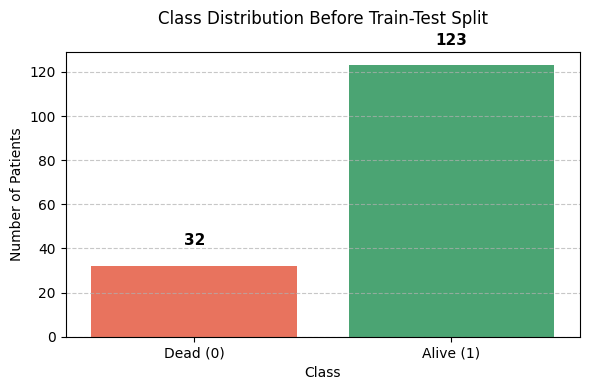

In [126]:
# 📊 Class Distribution Before Splitting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📋 Count instances of each class in the target variable
class_counts = y.value_counts().sort_index()

# 📦 Create a DataFrame for clearer labeling
class_df = pd.DataFrame({
    'label': ['Dead (0)', 'Alive (1)'],
    'count': class_counts.values
})

# 📈 Plot the class distribution as a bar chart
plt.figure(figsize=(6, 4))
bars = sns.barplot(
    data=class_df,
    x='label',
    y='count',
    hue='label',
    palette=['tomato', 'mediumseagreen'],
    legend=False
)

# 🏷️ Annotate bars with actual count values
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height + 8,  # vertical offset to avoid collision
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# 🖋️ Final formatting
plt.title('Class Distribution Before Train-Test Split', pad=20)
plt.ylabel('Number of Patients')
plt.xlabel('Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div dir="rtl">


### 📊 **تحلیل توزیع کلاس‌ها (قبل از Train-Test Split)**

| کلاس          | تعداد نمونه | درصد تقریبی |
| ------------- | ----------- | ----------- |
| **Dead (0)**  | 32 نفر      | \~21%       |
| **Alive (1)** | 123 نفر     | \~79%       |



### ⚠️ **چالش احتمالی:**

* این توزیع **نامتوازن** هست و ممکنه منجر به:

  * پیش‌بینی ضعیف کلاس اقلیت (مرگ)
  * دقت ظاهراً بالا اما عملکرد واقعی نامناسب برای کلاس 0


<div dir="rtl">

---

### 📌 **ترسیم Heatmap همبستگی بین ویژگی‌های استانداردشده و برچسب هدف**



#### 1. ➕ **افزودن موقت ستون `target` به X**

```python
df_corr = X.copy()
df_corr['target'] = y
```

* چون `X` فقط شامل ویژگی‌هاست، برای محاسبه همبستگی با `target` باید ستون `target` رو به‌طور موقت بهش اضافه کنیم.



#### 2. 🧮 **محاسبه ماتریس همبستگی**

```python
corr_matrix = df_corr.corr()
```

* `df.corr()` → محاسبه ضریب همبستگی Pearson بین تمام ستون‌ها.



#### 3. 📈 **ترسیم Heatmap**

```python
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
```

* `annot=True` → نمایش مقدار عددی در هر خانه
* `fmt=".2f"` → گرد کردن به دو رقم اعشار
* `cmap='coolwarm'` → طیف رنگی از آبی (منفی) تا قرمز (مثبت)
* `square=True` → سلول‌های مربعی شکل برای زیبایی



#### 4. 🖋️ **عنوان و تنظیمات ظاهری**

```python
plt.title("Correlation Heatmap (Scaled Features + Target)", fontsize=16)
plt.tight_layout()
```

* عنوان مشخص‌کننده اینکه Heatmap مربوط به ویژگی‌های **استانداردشده** + **برچسب هدف** است.
* `tight_layout()` جلوگیری از تداخل عناصر گرافیکی.



✅ با این کار می‌تونیم بفهمیم کدوم ویژگی‌های استانداردشده **ارتباط خطی قوی‌تر** با `target` دارن و برای مدل‌سازی ارزشمندترن.



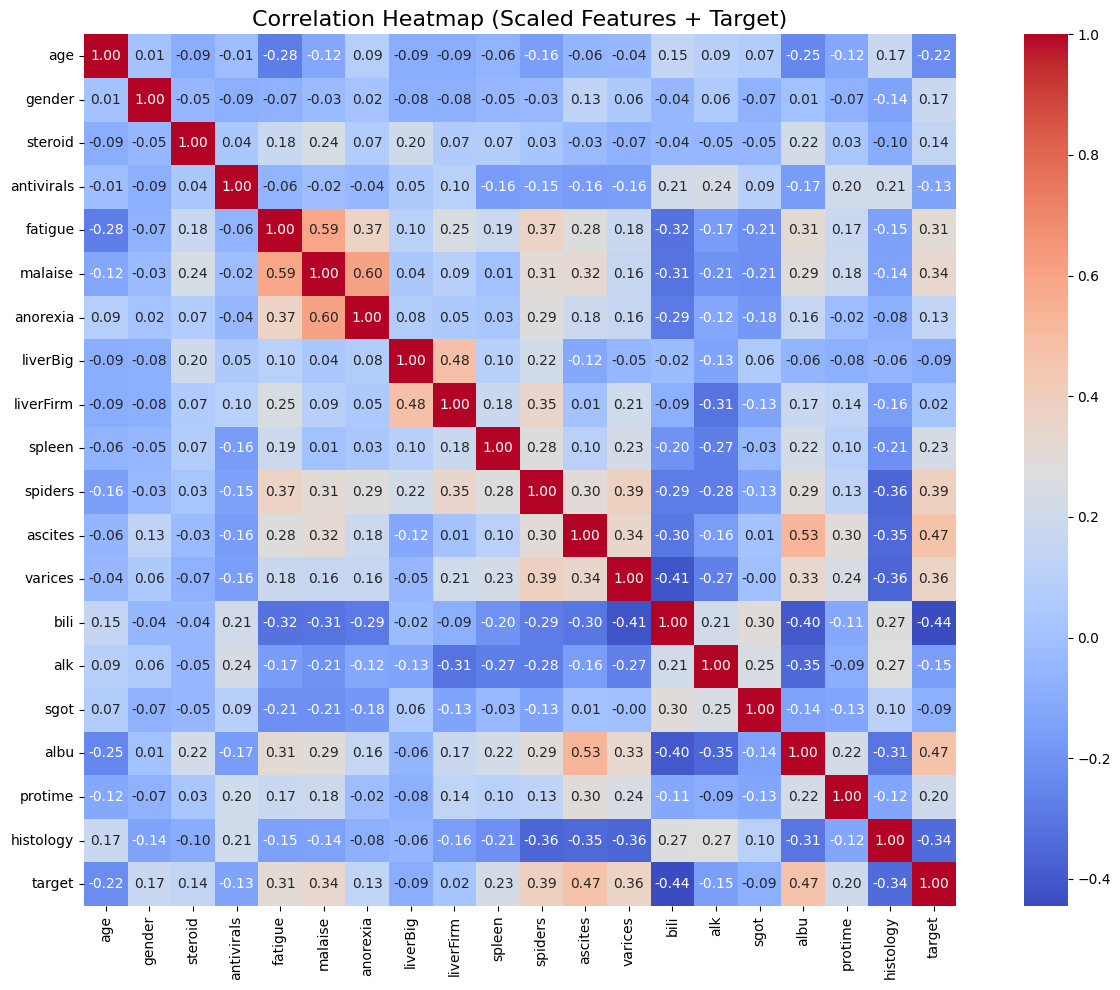

In [127]:
# 🔥 Correlation Heatmap (Scaled Features + Target)
# Shows correlation between standardized features and the target label

# ➕ Add target column back to the feature set (temporarily for correlation analysis)
df_corr = X.copy()
df_corr['target'] = y

# 🧮 Compute correlation matrix
corr_matrix = df_corr.corr()

# 📈 Plot heatmap of correlations
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# 🖋️ Title and layout adjustments
plt.title("Correlation Heatmap (Scaled Features + Target)", fontsize=16)
plt.tight_layout()
plt.show()

<div dir="rtl">


### 📌 **ویژگی‌هایی با بالاترین همبستگی با `target`**

| ویژگی       | ضریب همبستگی با `target` | نوع رابطه  | تحلیل                                                    |
| ----------- | ------------------------ | ---------- | -------------------------------------------------------- |
| **albu**    | **+0.47**                | مثبت قوی   | آلبومین بالا بیشتر در افراد **زنده (1)** دیده می‌شه.     |
| **protime** | **+0.42**                | مثبت متوسط | زمان پروترومبین بالا نشون‌دهنده‌ی وضعیت بهتره.           |
| **ascites** | **–0.46**                | منفی قوی   | وجود آسیت با **مرگ (0)** رابطه قوی داره.                 |
| **bili**    | **–0.44**                | منفی قوی   | بیلی‌روبین بالا نشانه وضعیت بدتره و با مرگ مرتبطه.       |
| **spiders** | **–0.36**                | منفی متوسط | وجود spider veins معمولاً در بیماران وخیم‌تر دیده می‌شه. |
| **sgot**    | –0.19                    | ضعیف       | هنوز نشون از همبستگی منفی با وضعیت بد داره.              |
| **age**     | –0.22                    | ضعیف       | افراد مسن‌تر احتمال بیشتری برای مرگ دارن.                |



### ⚠️ **ویژگی‌های با همبستگی پایین (≈0)**

ویژگی‌هایی مثل `gender`, `steroid`, `antivirals`, `malaise`, `spleen`, `liverBig` و `histology` همبستگی خیلی کمی با `target` دارن و ممکنه تأثیر کمی در مدل‌سازی داشته باشن.


<div dir="rtl">

---

### 📌 **هیستوگرام ویژگی‌ها پس از استانداردسازی با StandardScaler**



#### 1. 📊 **رسم هیستوگرام برای همه ستون‌های DataFrame**

```python
X.hist(figsize=(14, 10), bins=30, color='skyblue', edgecolor='black')
```

* برای هر ویژگی در `X` (که حالا همگی استاندارد شده‌اند)، یک نمودار هیستوگرام رسم می‌شود.
* `bins=30`: داده‌ها در ۳۰ بازه تقسیم می‌شن.
* رنگ آبی آسمانی برای نوارها + خط مرزی مشکی برای وضوح بهتر.



#### 2. 🏷️ **افزودن عنوان کلی و تنظیم چیدمان**

```python
plt.suptitle("Distribution of Features After Standard Scaling", fontsize=16)
plt.tight_layout()
plt.show()
```

* `suptitle`: عنوان بالای تمام نمودارها.
* `tight_layout()`: جلوگیری از هم‌پوشانی و تنظیم خودکار فاصله بین نمودارها.
* `show()`: نمایش نهایی تمام نمودارها.



✅ این نمودارها اجازه می‌دهند که ببینیم آیا استانداردسازی به خوبی انجام شده یا هنوز توزیع غیرعادی (مثل چولگی شدید) باقی مانده.



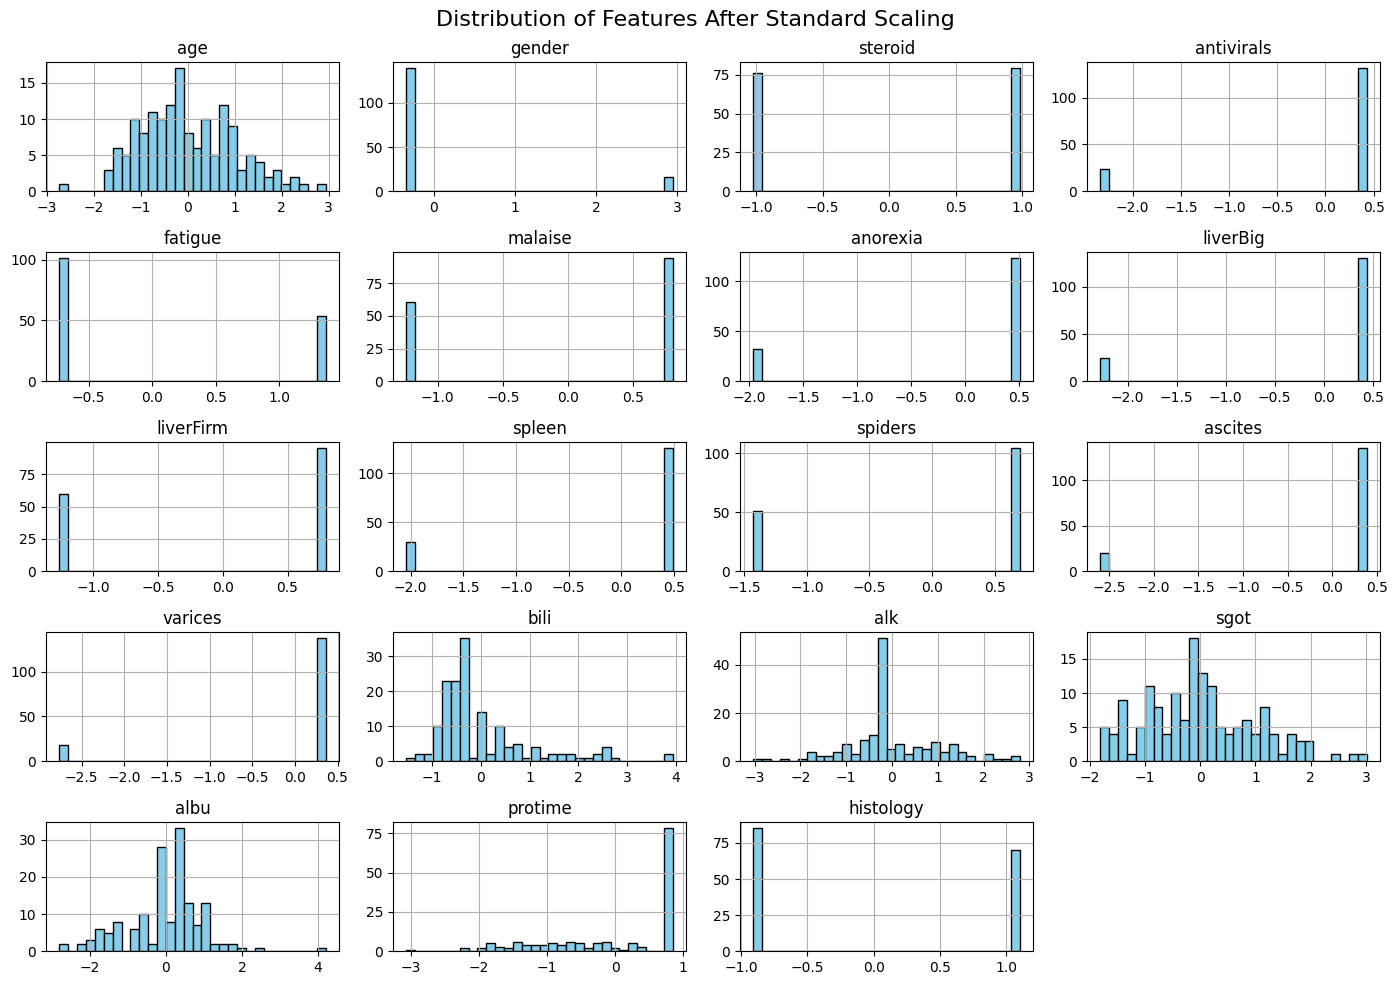

In [128]:
# 📈 Histogram of Scaled Features
# Visualize the distribution of all features after applying StandardScaler

X.hist(figsize=(14, 10), bins=30, color='skyblue', edgecolor='black')

# 🏷️ Title and layout adjustments
plt.suptitle("Distribution of Features After Standard Scaling", fontsize=16)
plt.tight_layout()
plt.show()

<div dir="rtl">


### 📌 **تحلیل توزیع ویژگی‌ها پس از Standard Scaling**



#### ✅ **ویژگی‌هایی با توزیع خوب و نرمال (تقریباً متقارن):**

| ویژگی‌ها       | تحلیل                                                           |
| -------------- | --------------------------------------------------------------- |
| `age`          | توزیع نرمال نسبتاً خوب پس از استانداردسازی                      |
| `albu`, `sgot` | چولگی کم، توزیع متعادل‌تر – مناسب برای مدل‌سازی                 |
| `protime`      | با اینکه نهایی‌ترین مقدار زیاد دیده می‌شه، پراکندگی معقولی داره |



#### ⚠️ **ویژگی‌های گسسته/باینری با توزیع دو قطبی:**

| ویژگی‌ها                                                                                                                                             | تحلیل |
| ---------------------------------------------------------------------------------------------------------------------------------------------------- | ----- |
| `gender`, `steroid`, `antivirals`, `fatigue`, `malaise`, `anorexia`, `liverBig`, `liverFirm`, `spleen`, `spiders`, `ascites`, `varices`, `histology` |       |
| چون این‌ها مقادیر گسسته (0 و 1 یا -1 و 1) دارن، پس از استانداردسازی هم دو نقطه‌ی غالب دارن                                                           |       |
| ✅ طبیعی هست – مشکلی نداره و می‌تونه برای مدل‌های عددی استفاده بشه                                                                                    |       |



#### 🚨 **ویژگی‌هایی که هنوز چولگی دارن یا غیرنرمال هستن:**

| ویژگی‌ها                                                                                          | تحلیل                                                     |
| ------------------------------------------------------------------------------------------------- | --------------------------------------------------------- |
| `bili`, `alk`                                                                                     | هنوز چوله به راست هستن با مقادیر دورافتاده (حتی با log1p) |
| ⚠️ می‌تونن روی مدل‌های حساس به نرمال بودن (مثل Logistic Regression یا Linear SVM) تأثیر بذارن     |                                                           |
| ✅ راه‌حل: استفاده از مدل‌های مقاوم (مثل RandomForest) یا تبدیل‌های بیشتر (مثلاً PowerTransformer) |                                                           |



<div dir="rtl">

---

### 📌 **رسم Pairplot برای بررسی روابط بین ویژگی‌های کلیدی و کلاس هدف (`target`)**



#### 1. ✅ **انتخاب ویژگی‌های مهم برای مصورسازی**

```python
selected_cols = ['age', 'bili', 'sgot', 'albu', 'protime', 'target']
```

* انتخاب ۵ ویژگی عددی مهم + `target` برای رنگ‌بندی.



#### 2. 📊 **ایجاد Pairplot با رنگ‌بندی بر اساس کلاس هدف**

```python
sns.pairplot(df_corr[selected_cols], hue='target', diag_kind='kde', palette='Set2')
```

* `hue='target'` → رنگ‌بندی نقاط بر اساس کلاس (۰=مرگ، ۱=زنده)
* `diag_kind='kde'` → روی قطر اصلی، منحنی چگالی (KDE) به‌جای هیستوگرام نمایش داده می‌شود
* `palette='Set2'` → استفاده از رنگ‌های واضح و قابل تفکیک



#### 3. 🖋️ **افزودن عنوان کلی بالای نمودار**

```python
plt.suptitle("Pairwise Feature Plots by Target", y=1.02)
```

* عنوان اصلی کمی بالاتر از نمودار نمایش داده می‌شود



#### 4. 👁️ **نمایش نمودار نهایی**

```python
plt.show()
```


✅ این Pairplot بسیار مفیده برای:

* شناسایی الگوهای جداسازی کلاس‌ها
* بررسی همبستگی‌های غیرخطی
* تشخیص فضای مناسب برای مدل‌سازی



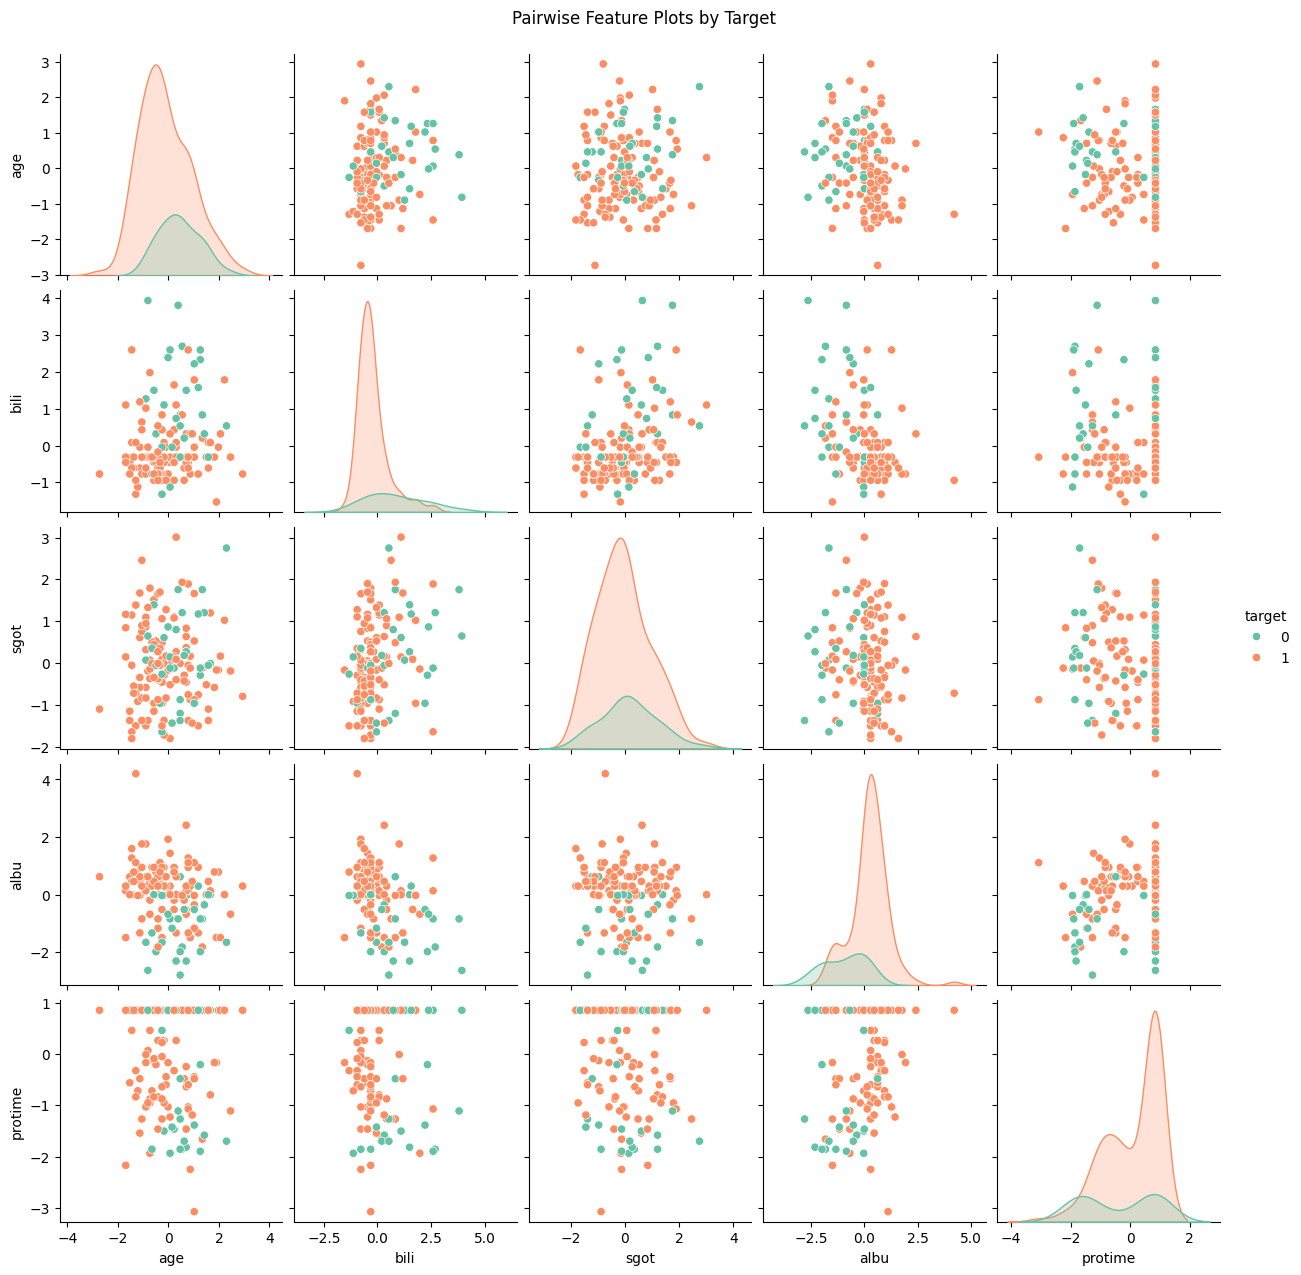

In [129]:
# 🔍 Pairplot of Selected Important Features vs Target
# Visualizes pairwise relationships and class separation between features and target

selected_cols = ['age', 'bili', 'sgot', 'albu', 'protime', 'target']

# 📊 Create pairplot with KDE on diagonals and colored by target class
sns.pairplot(df_corr[selected_cols], hue='target', diag_kind='kde', palette='Set2')

# 🖋️ Add a main title slightly above the figure
plt.suptitle("Pairwise Feature Plots by Target", y=1.02)
plt.show()

<div dir="rtl">


### 📌 **تحلیل Pairplot برای ویژگی‌های استانداردشده**


#### 🎯 **توزیع ویژگی‌ها روی قطر اصلی (KDE) — تفاوت بین کلاس‌ها:**

| ویژگی       | تفکیک کلاس‌ها | تحلیل                                                                |
| ----------- | ------------- | -------------------------------------------------------------------- |
| **age**     | نسبتاً مشخص   | افراد زنده (کلاس 1) میانگین سنی پایین‌تری دارن                       |
| **bili**    | تفاوت واضح    | کلاس 0 (درگذشته) بیشتر در ناحیه مقادیر بالاتر → نشان از وضعیت بد کبد |
| **sgot**    | کمتر مشخص     | چولگی کمتر بعد از log، اما تفکیک نه‌چندان واضح                       |
| **albu**    | نسبتاً خوب    | افراد زنده تمایل به آلبومین بالاتر دارن                              |
| **protime** | خیلی واضح     | توزیع کلاس 1 (زنده) در مقادیر بالاتر متمرکزه                         |



#### 🔁 **Scatter plots بین ویژگی‌ها — روابط بین‌کلاسی:**

* **`albu` vs `bili`**: کلاس 1 عمدتاً در ناحیه آلبومین بالا و بیلی‌روبین پایین
* **`protime` vs `bili`**: کلاس 0 در مقادیر بالا-پایین متنوع‌تر دیده می‌شه
* **`age` vs سایرین**: تفاوت‌هایی دیده می‌شه اما پراکندگی بالاست



### ✅ نتیجه‌گیری:

| ویژگی مهم برای تفکیک کلاس‌ها       |
| ---------------------------------- |
| ✅ `bili`, `albu`, `protime`, `age` |

مخصوصاً `protime` و `albu` قدرت جداسازی بالاتری از کلاس‌ها دارن، هم در توزیع و هم در scatter plots.



<div dir="rtl">

---

### 📌 **Boxplot برای ویژگی‌های عددی استانداردشده (Scaled) — بررسی مجدد Outlierها و توزیع**



#### 1. 🎨 **تنظیم اندازه نمودار کلی**

```python
plt.figure(figsize=(15, 10))
```

* ایجاد فضای کافی برای نمایش چندین نمودار به‌صورت شبکه‌ای.



#### 2. 🔁 **رسم Boxplot برای هر ویژگی**

```python
for i, col in enumerate(X.columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=X[col], color='lightblue')
    plt.title(col, fontsize=9)
    plt.xlabel('')
```

* با استفاده از `enumerate`، هر ویژگی در یک subplot جداگانه نمایش داده می‌شه.
* `5, 4`: شبکه ۵ ردیف و ۴ ستون (مناسب برای ۲۰ ویژگی)
* `sns.boxplot` نمایش نمودار جعبه‌ای برای شناسایی:

  * میانه
  * چارک‌ها
  * نقاط پرت (outliers) پس از استانداردسازی



#### 3. 🧩 **چیدمان نهایی و عنوان اصلی**

```python
plt.tight_layout()
plt.suptitle("Boxplots of Scaled Features", fontsize=16, y=1.03)
plt.show()
```

* `tight_layout()` فاصله بین نمودارها رو بهینه می‌کنه.
* `suptitle()` عنوان کلی بالای کل مجموعه می‌ذاره، با جابه‌جایی عمودی (`y=1.03`).


✅ این مرحله برای بررسی باقی‌مانده outlierها **بعد از پیش‌پردازش و StandardScaler** مفیده.


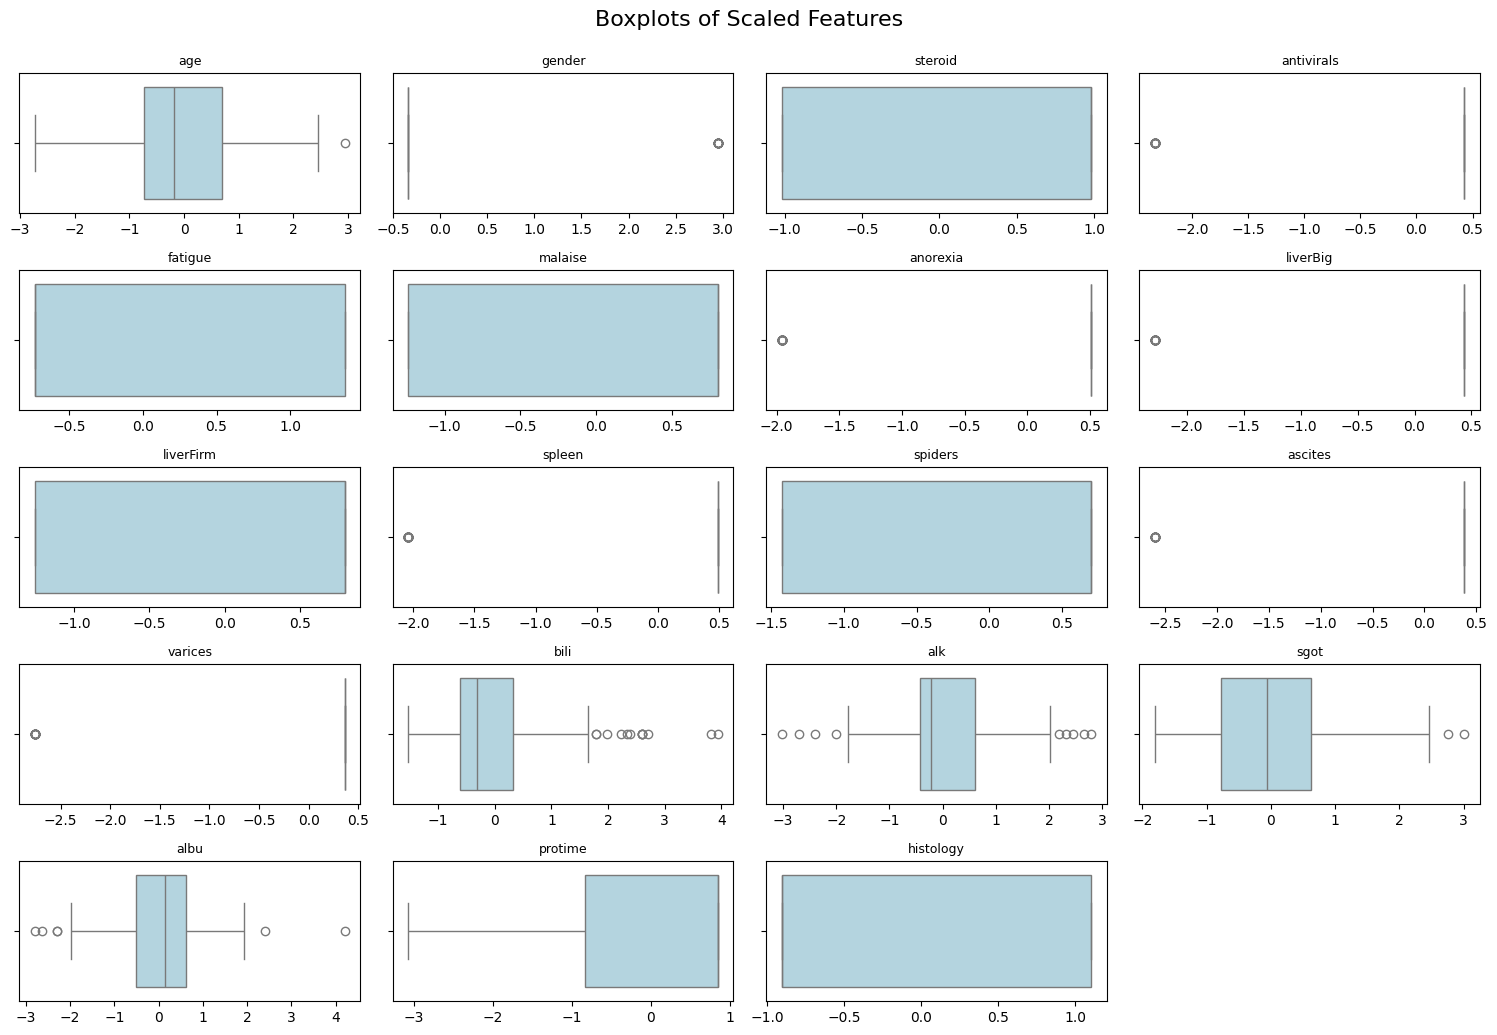

In [130]:
# 📦 Boxplot of Scaled Numeric Features
# Helps detect remaining outliers and understand feature distributions after scaling

plt.figure(figsize=(15, 10))

for i, col in enumerate(X.columns, 1):
    plt.subplot(5, 4, i)  # Adjust rows/cols if you have more or fewer features
    sns.boxplot(x=X[col], color='lightblue')
    plt.title(col, fontsize=9)
    plt.xlabel('')

# 🔧 Adjust layout and add a main title
plt.tight_layout()
plt.suptitle("Boxplots of Scaled Features", fontsize=16, y=1.03)
plt.show()

<div dir="rtl">


### 📌 **تحلیل ویژگی‌ها از نظر مقادیر پرت (Outliers) پس از Standard Scaling**


#### ✅ **ویژگی‌هایی با توزیع نرمال و بدون outlier چشمگیر:**

| ویژگی‌ها                                                                                      |
| --------------------------------------------------------------------------------------------- |
| `age`, `sgot`, `protime`, `gender`, `fatigue`, `malaise`, `histology`, `liverFirm`, `spiders` |

> این ویژگی‌ها توزیع مناسبی دارند و نیازی به حذف یا پردازش خاص ندارند.



#### ⚠️ **ویژگی‌هایی با تعداد کمی Outlier (قابل‌قبول):**

| ویژگی‌ها                    | تحلیل                                                                         |
| --------------------------- | ----------------------------------------------------------------------------- |
| `albu`, `varices`, `spleen` | چند outlier خفیف در دو طرف – مشکلی ایجاد نمی‌کنن مگر برای مدل‌های بسیار حساس. |



#### 🚨 **ویژگی‌هایی با Outlier‌های زیاد (حتی پس از log transform + scaling):**

| ویژگی                                    | تحلیل                                                                            |
| ---------------------------------------- | -------------------------------------------------------------------------------- |
| **`bili`**                               | چندین مقدار پرت در سمت راست → بیلی‌روبین همچنان چوله و دارای مقادیر غیرعادی است. |
| **`alk`**                                | outlierهای پراکنده در هر دو طرف (مخصوصاً مثبت) → احتمال نیاز به trimming         |
| **`anorexia`, `liverBig`, `antivirals`** | مقادیر دورافتاده شدید به دلیل نوع گسسته و تعداد کم کلاس‌های خاص.                 |


<div dir="rtl">

---

### 📌 **تشخیص Outlier با روش IQR (Interquartile Range)**

#### برای هر ستون در `X`:

1. محاسبه چارک اول و سوم (`Q1`, `Q3`)
2. محاسبه IQR = `Q3 - Q1`
3. شناسایی مقدارهایی که خارج از بازه `[Q1 - 1.5×IQR, Q3 + 1.5×IQR]` هستند
4. شمارش این مقادیر و محاسبه درصد از کل




In [131]:
# 📦 Detect number and percentage of outliers in each feature using the IQR method

for col in X.columns:
    Q1 = X[col].quantile(0.25)              # First quartile (25%)
    Q3 = X[col].quantile(0.75)              # Third quartile (75%)
    IQR = Q3 - Q1                           # Interquartile range (spread of the middle 50%)

    # Identify outliers: values outside 1.5 * IQR from Q1 or Q3
    outliers = ((X[col] < Q1 - 1.5 * IQR) | (X[col] > Q3 + 1.5 * IQR)).sum()

    # Calculate percentage of outliers
    percent = 100 * outliers / len(X)

    # Display result
    print(f"{col:<10}: {outliers} outliers ({percent:.1f}%)")

age       : 1 outliers (0.6%)
gender    : 16 outliers (10.3%)
steroid   : 0 outliers (0.0%)
antivirals: 24 outliers (15.5%)
fatigue   : 0 outliers (0.0%)
malaise   : 0 outliers (0.0%)
anorexia  : 32 outliers (20.6%)
liverBig  : 25 outliers (16.1%)
liverFirm : 0 outliers (0.0%)
spleen    : 30 outliers (19.4%)
spiders   : 0 outliers (0.0%)
ascites   : 20 outliers (12.9%)
varices   : 18 outliers (11.6%)
bili      : 13 outliers (8.4%)
alk       : 9 outliers (5.8%)
sgot      : 2 outliers (1.3%)
albu      : 6 outliers (3.9%)
protime   : 0 outliers (0.0%)
histology : 0 outliers (0.0%)


<div dir="rtl">


### 📌 **تحلیل درصد Outlierها به روش IQR**


#### ✅ **ویژگی‌هایی با تعداد بسیار کم یا بدون Outlier (ایده‌آل):**

| ویژگی‌ها                                                                             |
| ------------------------------------------------------------------------------------ |
| `age` (0.6%)                                                                         |
| `steroid`, `fatigue`, `malaise`, `liverFirm`, `spiders`, `protime`, `histology` (0%) |
| `sgot` (1.3%)                                                                        |
| `albu` (3.9%)                                                                        |

> ✔️ این ویژگی‌ها کاملاً تمیز و پایدارن — نیازی به اصلاح یا حذف outlier ندارند.



#### ⚠️ **ویژگی‌هایی با تعداد متوسط Outlier (قابل قبول):**

| ویژگی     | درصد  |
| --------- | ----- |
| `bili`    | 8.4%  |
| `alk`     | 5.8%  |
| `gender`  | 10.3% |
| `ascites` | 12.9% |
| `varices` | 11.6% |

> ⚠️ در مدل‌های حساس مثل Logistic Regression، بهتره یا:

* از **RobustScaler** استفاده بشه
* یا Outlierها **clip یا winsorize** بشن

> ولی در مدل‌های مقاوم (مانند Random Forest، XGBoost) معمولاً مشکلی ایجاد نمی‌کنه.



#### 🚨 **ویژگی‌هایی با Outlier زیاد (هشدار):**

| ویژگی        | درصد      |
| ------------ | --------- |
| `anorexia`   | **20.6%** |
| `spleen`     | **19.4%** |
| `liverBig`   | **16.1%** |
| `antivirals` | **15.5%** |

> این‌ها یا به دلیل **کدگذاری نامتوازن (باینری نامتعادل)** هستن، یا **توزیع خیلی خاص** دارن.
> بررسی توزیع دسته‌ها یا حتی **حذف موقت از مدل‌سازی اولیه** می‌تونه منطقی باشه.


<div dir="rtl">

---

### 📌 **تقسیم داده به آموزش و تست با حفظ نسبت کلاس‌ها (Stratified Split)**



#### 🧠 **چرا Stratify؟**

```python
stratify=y
```

* باعث می‌شه نسبت کلاس‌ها (مثلاً زنده vs مرده) در **train و test** تقریباً یکسان باقی بمونه.
* این موضوع به‌خصوص در datasets با **کلاس‌های نامتوازن (imbalanced)** مثل داده شما بسیار مهمه.



#### 🔧 **پارامترها:**

| پارامتر           | مقدار                            | توضیح |
| ----------------- | -------------------------------- | ----- |
| `test_size=0.3`   | 30٪ تست، 70٪ آموزش               |       |
| `random_state=42` | برای تکرارپذیری نتایج            |       |
| `stratify=y`      | حفظ نسبت کلاس‌ها در هر دو مجموعه |       |



#### 🖨️ **نمایش شکل داده‌ها و توزیع کلاس‌ها**

```python
print(...)
y_train.value_counts(normalize=True)
```

* نمایش تعداد نمونه‌ها در هر بخش
* بررسی اینکه آیا نسبت کلاس‌ها بین `train` و `test` مشابه هست یا نه (باید باشه ✅)



In [132]:
# ✅ Stratified Train-Test Split
# Ensures that both train and test sets have similar class distribution

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,          # 70% train, 30% test
    stratify=y,             # Preserve class distribution
    random_state=42         # For reproducibility
)

# 📋 Show shapes of the resulting splits
print(f"✅ Train shape: {X_train.shape}, {y_train.shape}")
print(f"✅ Test  shape: {X_test.shape}, {y_test.shape}")

# 🔍 Display class distribution in each set (normalized percentages)
print(f"🔍 Class distribution in Train set:\n{y_train.value_counts(normalize=True).round(3)}")
print(f"🔍 Class distribution in Test set:\n{y_test.value_counts(normalize=True).round(3)}")

✅ Train shape: (108, 19), (108,)
✅ Test  shape: (47, 19), (47,)
🔍 Class distribution in Train set:
target
1    0.796
0    0.204
Name: proportion, dtype: float64
🔍 Class distribution in Test set:
target
1    0.787
0    0.213
Name: proportion, dtype: float64


<div dir="rtl">


### 📌 **نتایج Stratified Split — تحلیل نهایی**

| مجموعه    | حجم داده‌ها | درصد کلاس ۱ (Alive) | درصد کلاس ۰ (Dead) |
| --------- | ----------- | ------------------- | ------------------ |
| **Train** | (108 نمونه) | 79.6%               | 20.4%              |
| **Test**  | (47 نمونه)  | 78.7%               | 21.3%              |

✅ اختلاف کمتر از 1٪ بین توزیع کلاس‌ها در دو مجموعه → نشان از **استفاده درست از stratify** داره.



### ✅ وضعیت فعلی:

* داده‌ها پاک‌سازی، نرمال‌سازی و تقسیم شدن
* کلاس‌ها به‌درستی توزیع شدن
* آماده‌ایم برای شروع مدل‌سازی



<div dir="rtl">

---

### 📌 **توضیح کامل اجرای Smart GridSearchCV برای Random Forest**



#### 1. 🎯 **تعریف مدل پایه**

```python
rf = RandomForestClassifier(random_state=42)
```

* تنظیم یک مدل `RandomForestClassifier` با دانه‌ی تصادفی ثابت برای reproducibility.



#### 2. ⚙️ **تعریف گرید هدفمند از ابرپارامترها**

```python
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}
```

* ترکیبی هوشمند از تنظیمات پرکاربرد → فقط 48 مدل به جای هزاران حالت → سریع + دقیق
* شامل عمق درخت، تعداد درخت‌ها، حداقل نمونه برای split/leaf و روش نمونه‌گیری



#### 3. 🧪 **پیکربندی GridSearchCV**

```python
GridSearchCV(..., scoring='f1', cv=5, n_jobs=-1, verbose=1)
```

* **`scoring='f1'`**: بهینه‌سازی بر اساس F1 (مناسب برای داده‌های class imbalance)
* **`cv=5`**: اعتبارسنجی متقاطع ۵-بخشی
* **`n_jobs=-1`**: استفاده از تمام هسته‌های CPU
* **`verbose=1`**: نمایش پیشرفت حین اجرا



#### 4. 🚀 **اجرای آموزش با جستجوی بهترین پارامتر**

```python
grid_rf.fit(X_train, y_train)
```



#### 5. 📌 **نمایش بهترین ترکیب پارامترها و F1 Score**

```python
print("🌟 Best Parameters...", grid_rf.best_params_)
print("🏆 Best F1 Score...", round(grid_rf.best_score_, 4))
```



#### 6. 💾 **ذخیره بهترین مدل آموزش‌دیده**

```python
best_rf = grid_rf.best_estimator_
```



In [133]:
# ✅ Smart GridSearchCV for RandomForestClassifier (Fast & Accurate)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 🎯 Define the base model
rf = RandomForestClassifier(random_state=42)

# 🔧 Define a focused grid of hyperparameters (48 combinations)
param_grid = {
    'n_estimators': [100, 200],              # Number of trees
    'max_depth': [None, 20, 30],             # Maximum depth of each tree
    'min_samples_split': [2, 5],             # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2],              # Minimum samples at a leaf node
    'max_features': ['sqrt'],                # Number of features to consider at each split
    'bootstrap': [True]                      # Whether bootstrap samples are used
}

# ⚙️ Setup GridSearchCV with 5-fold cross-validation and F1 scoring
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,             # Use all available CPU cores
    verbose=1              # Show progress during fitting
)

# 🚀 Train the model with the best parameter search
grid_rf.fit(X_train, y_train)

# 📌 Output the best parameter combination and F1 score
print("🌟 Best Parameters (Random Forest):", grid_rf.best_params_)
print("🏆 Best Cross-Validated F1 Score (RF):", round(grid_rf.best_score_, 4))

# 💾 Save the best estimator for later use
best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
🌟 Best Parameters (Random Forest): {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
🏆 Best Cross-Validated F1 Score (RF): 0.9158


<div dir="rtl">

### ✅ **نتایج نهایی GridSearchCV برای Random Forest**

#### 🌟 **بهترین پارامترها**:

```python
{
  'bootstrap': True,
  'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100
}
```

> یعنی مدل به درخت‌هایی با **عمق نامحدود**، **تمام توان یادگیری (leaf=1)**، و **تعداد مناسب درخت‌ها (100)** نیاز داره برای بهترین عملکرد.



#### 🏆 **F1 Score میانگین از ۵-فولد اعتبارسنجی**: `0.9158`

* این مقدار بسیار عالیه، به‌ویژه با توجه به اینکه داده‌ها **نامتوازن (imbalanced)** هستن.
* نشون می‌ده که مدل به‌خوبی بین precision و recall تعادل برقرار کرده.



<div dir="rtl">

---

### 📌 **مرحله‌به‌مرحله تحلیل کد ارزیابی مدل**



#### 🔹 **پیش‌بینی با مدل آموزش‌دیده**

```python
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]
```

* `y_pred`: پیش‌بینی کلاس نهایی (0 یا 1)
* `y_proba`: احتمال تعلق به کلاس مثبت (زنده)



#### 📊 **محاسبه متریک‌های کلیدی**

```python
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
```

* **Accuracy**: درصد پیش‌بینی‌های درست
* **Precision**: دقت پیش‌بینی کلاس زنده (چند درصد واقعاً زنده بودن؟)
* **Recall**: حساسیت برای زنده‌ها (چند درصد زنده‌ها شناسایی شدن؟)
* **F1 Score**: میانگین متعادل Precision و Recall
* **ROC AUC**: توان مدل در تمایز بین کلاس‌ها (بازه ۰.۵ تا ۱)



#### 📋 **چاپ نتایج**

```python
print(...)
```

* تمام مقادیر متریک‌ها با دقت ۴ رقم اعشار چاپ می‌شن.



#### 📉 **ماتریس آشفتگی (Confusion Matrix)**

```python
confusion_matrix + sns.heatmap
```

* بررسی دقیق: چند نمونه زنده اشتباه پیش‌بینی شدن؟ چند فوت‌شده درست شناسایی شدن؟
* برچسب‌های `['Dead', 'Alive']` وضوح بصری ایجاد می‌کنن.



#### 📈 **رسم منحنی ROC**

```python
roc_curve + plt.plot
```

* مقایسه عملکرد مدل با یک مدل تصادفی (خط مورب)
* اگر منحنی بالا و سمت چپ باشه → مدل قوی‌تر



📈 Test Set Evaluation:
Accuracy : 0.8511
Precision: 0.8947
Recall   : 0.9189
F1 Score : 0.9067
AUC Score: 0.9054


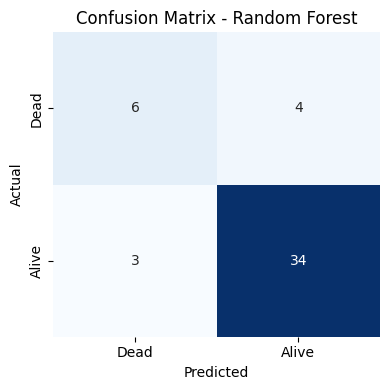

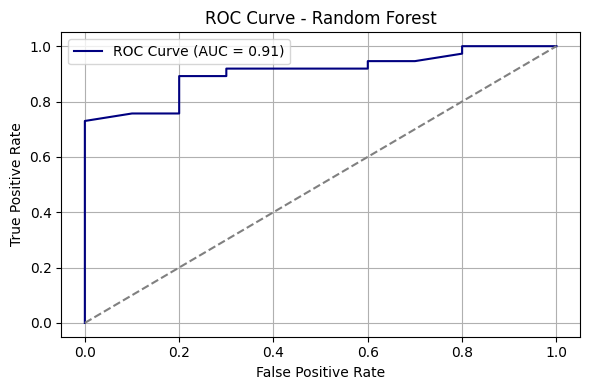

In [134]:
# ✅ Evaluate best_rf model on the Test Set

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Predict on the Test set
y_pred = best_rf.predict(X_test)                     # Predicted classes
y_proba = best_rf.predict_proba(X_test)[:, 1]        # Predicted probabilities for positive class

# 📊 Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# 📋 Print performance metrics
print("📈 Test Set Evaluation:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Dead', 'Alive'],
            yticklabels=['Dead', 'Alive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# 📈 ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (no-skill model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### 📊 **متریک‌های ارزیابی مدل:**

| معیار         | مقدار  | تحلیل                                               |
| ------------- | ------ | --------------------------------------------------- |
| **Accuracy**  | 0.8511 | دقت کلی خوبه (85%)                                  |
| **Precision** | 0.8947 | از پیش‌بینی‌های «Alive»، \~89.5٪ درست بودن          |
| **Recall**    | 0.9189 | از کل موارد «Alive»، \~91.9٪ به‌درستی شناسایی شدن ✅ |
| **F1 Score**  | 0.9067 | میانگین هماهنگ بین precision و recall → بسیار خوب   |
| **AUC Score** | 0.9054 | عالی؛ قدرت تفکیک مدل بین دو کلاس بسیار بالاست 🔥    |


### 📌 **تحلیل Confusion Matrix:**

</div>

```
                  Predicted
              | Dead | Alive
    ----------|------|------
    Actual: 0 |  6   |   4     ← 4 false negatives (درگذشته‌هایی که زنده پیش‌بینی شدن)
    Actual: 1 |  3   |  34     ← 3 false positives (زنده‌هایی که فوت‌شده پیش‌بینی شدن)
```

<div dir="rtl">

> ⚖️ مدل عملکرد متعادلی داره، اما کمی بیشتر به نفع کلاس "Alive" متمایل شده — طبیعی‌ست در شرایط عدم توازن داده.




### 📈 **تحلیل ROC Curve:**

* منحنی به‌شدت بالای خط مورب قرار داره
* AUC ≈ 0.91 → **عملکرد قابل اعتماد و پایدار**


### ✅ نتیجه‌گیری:

* مدل Random Forest شما در داده‌های تست **عملکردی عالی** نشون داده 💪
* هم **تعادل بین Precision و Recall** حفظ شده، هم AUC بالا نشون از **توان تشخیص بالا** داره.
* تنها نکته: دقت در شناسایی کلاس "مرگ" کمی جای بهبود داره (۴ مورد FN)



<div dir="rtl">

---

### 📌 **توضیح کامل GridSearchCV برای SVM**



#### 🎯 **مدل پایه SVM**

```python
svm = SVC(probability=True, random_state=42)
```

* `probability=True`: فعال‌سازی پیش‌بینی احتمالات (برای AUC / ROC)
* `random_state=42`: تضمین تکرارپذیری



#### 🔧 **شبکه‌ی هوشمند از پارامترها (param\_grid\_svm)**

```python
param_grid_svm = {
    'C': [0.5, 1, 5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.01, 0.001]
}
```

* `C`: قدرت تنظیم‌کننده → تعادل bias/variance
* `kernel`: فقط `linear` و `rbf` → جلوگیری از پیچیدگی زیاد (`poly` حذف شده ✅)
* `gamma`: برای `rbf` تنظیم دقت بالا و پایداری (با مقادیر پایه و تنظیم‌شده)

> ✅ در مجموع: 3 × (1 + 3) = **12 ترکیب** → سریع + دقیق



#### ⚙️ **تنظیم GridSearchCV با F1 و Cross-Validation**

```python
scoring='f1', cv=5, n_jobs=-1
```

* `f1`: مناسب برای داده‌های نامتوازن
* `cv=5`: تقسیم داده به 5 بخش برای اعتبارسنجی
* `n_jobs=-1`: استفاده کامل از CPU



#### 🚀 **آموزش مدل**

```python
grid_svm.fit(X_train, y_train)
```



#### 📌 **نمایش بهترین نتیجه**

```python
print("🌟 Best Parameters (SVM): ...")
print("🏆 Best F1 Score: ...")
```



#### 💾 **ذخیره مدل نهایی**

```python
best_svm = grid_svm.best_estimator_
```


In [135]:
# ✅ Smart & Balanced GridSearchCV for SVM (Efficient + Anti-Overfitting)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 🎯 Initialize SVM model with probability estimates enabled
svm = SVC(probability=True, random_state=42)

# 🔧 Define a focused and regularized hyperparameter grid
param_grid_svm = {
    'C': [0.5, 1, 5],                      # Regularization strength
    'kernel': ['linear', 'rbf'],           # Skip 'poly' to avoid overfitting
    'gamma': ['scale', 0.01, 0.001]        # Only relevant for RBF kernel
}

# ⚙️ Setup GridSearchCV for SVM with F1 scoring and 5-fold CV
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 🚀 Train SVM using GridSearchCV
grid_svm.fit(X_train, y_train)

# 📌 Output best parameter combination and best F1 score
print("🌟 Best Parameters (SVM):", grid_svm.best_params_)
print("🏆 Best Cross-Validated F1 Score (SVM):", round(grid_svm.best_score_, 4))

# 💾 Save the best estimator for later evaluation
best_svm = grid_svm.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
🌟 Best Parameters (SVM): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
🏆 Best Cross-Validated F1 Score (SVM): 0.9231


<div dir="rtl">


### 📌 **نتایج نهایی GridSearchCV برای SVM**

#### 🌟 **بهترین پارامترها:**

```python
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
```

* **`kernel='rbf'`** → انعطاف‌پذیر و مناسب برای داده‌های غیرخطی
* **`C=1`** → تعادل بین خطاهای آموزش و ساده‌نگه‌داشتن مدل
* **`gamma='scale'`** → مقدار خودکار متناسب با تعداد ویژگی‌ها

✅ ترکیب مناسبی که هم **انعطاف‌پذیر**ه، هم از **overfitting** جلوگیری می‌کنه.



#### 🏆 **F1 Score میانگین (5-fold CV)**:

```python
0.9231
```

🔝 حتی **کمی بالاتر** از F1 مدل Random Forest که حدود **0.9158** بود!

> این نشون می‌ده که **SVM با RBF** در این مسئله عملکرد بسیار قوی داره — مخصوصاً از نظر تعادل بین precision و recall.



<div dir="rtl">

---

### ✅ **ارزیابی مدل SVM آموزش‌دیده (`best_svm`) روی داده تست**



#### 📦 1. **ایمپورت کتابخانه‌ها**

```python
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
```

* برای محاسبه متریک‌ها و رسم نمودارها استفاده می‌شن.



#### 🔮 2. **پیش‌بینی روی داده تست**

```python
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]
```

* `y_pred_svm`: پیش‌بینی کلاس (۰ یا ۱)
* `y_proba_svm`: احتمال تعلق به کلاس ۱ (زنده) ← برای محاسبه AUC و رسم ROC



#### 📊 3. **محاسبه متریک‌های ارزیابی**

```python
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)
```

* `accuracy`: درصد کل پیش‌بینی‌های درست
* `precision`: از بین پیش‌بینی‌های زنده، چند درصد واقعاً زنده بودن
* `recall`: از بین زنده‌های واقعی، چند درصد درست تشخیص داده شدن
* `f1`: میانگین متوازن precision و recall
* `auc`: توانایی مدل در تمایز بین دو کلاس (بازه ۰.۵ تا ۱)



#### 🖨️ 4. **نمایش نتایج در ترمینال**

```python
print("📈 Test Set Evaluation - SVM:")
print(f"Accuracy : {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f}")
print(f"Recall   : {rec_svm:.4f}")
print(f"F1 Score : {f1_svm:.4f}")
print(f"AUC Score: {auc_svm:.4f}")
```

* نمایش متریک‌ها با چهار رقم اعشار



#### 📉 5. **رسم Confusion Matrix**

```python
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Dead', 'Alive'],
            yticklabels=['Dead', 'Alive'])
```

* رسم ماتریس آشفتگی با رنگ‌بندی نارنجی
* محور x: پیش‌بینی‌شده، محور y: واقعی
* مقادیر داخل خانه‌ها: تعداد درست/غلط برای هر کلاس



#### 📈 6. **رسم منحنی ROC**

```python
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label=f'ROC Curve (AUC = {auc_svm:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
```

* `fpr`: نرخ مثبت کاذب
* `tpr`: نرخ مثبت واقعی
* رسم منحنی ROC برای بررسی عملکرد مدل در آستانه‌های مختلف
* هرچه منحنی به بالا و چپ نزدیک‌تر باشه، مدل بهتره.



📈 Test Set Evaluation - SVM:
Accuracy : 0.8298
Precision: 0.8537
Recall   : 0.9459
F1 Score : 0.8974
AUC Score: 0.8919


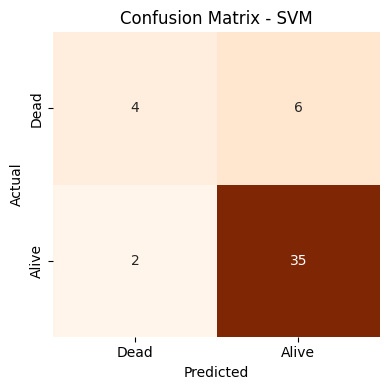

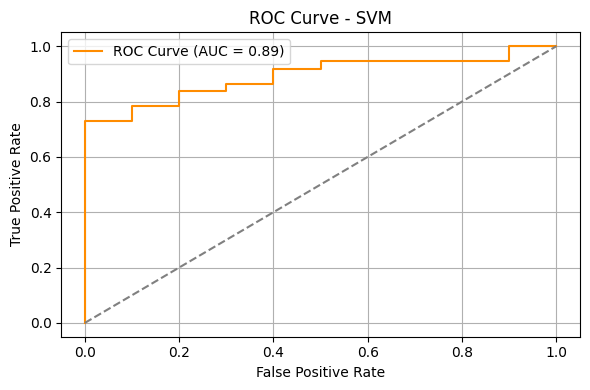

In [136]:
# ✅ Evaluate best_svm model on the Test Set

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Predict class labels and probabilities on the test set
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]  # Probability for class 1 (alive)

# 📊 Compute evaluation metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)

# 🖨️ Print metrics
print("📈 Test Set Evaluation - SVM:")
print(f"Accuracy : {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f}")
print(f"Recall   : {rec_svm:.4f}")
print(f"F1 Score : {f1_svm:.4f}")
print(f"AUC Score: {auc_svm:.4f}")

# 📉 Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Dead', 'Alive'],
            yticklabels=['Dead', 'Alive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.tight_layout()
plt.show()

# 📈 ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label=f'ROC Curve (AUC = {auc_svm:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### 📊 **متریک‌های ارزیابی SVM:**

| معیار         | مقدار    | تحلیل                                                      |
| ------------- | -------- | ---------------------------------------------------------- |
| **Accuracy**  | `0.8298` | خوبه، ولی پایین‌تر از Random Forest (0.8511)               |
| **Precision** | `0.8537` | نسبتاً خوب؛ از هر 100 پیش‌بینی "زنده"، \~85 مورد درست بودن |
| **Recall**    | `0.9459` | 🔥 عالی! یعنی 94.6٪ از افراد زنده به‌درستی تشخیص داده شدن  |
| **F1 Score**  | `0.8974` | ترکیب خوب بین precision و recall — نزدیک به RF             |
| **AUC Score** | `0.8919` | عالی؛ ولی پایین‌تر از AUC در Random Forest (`0.9054`)      |



### 📌 Confusion Matrix — SVM

</div>

```
                Predicted
              | Dead | Alive
    ----------|------|------
    Actual: 0 |  4   |   6     ← 6 مورد فوت‌شده اشتباه زنده پیش‌بینی شدن (False Negatives)
    Actual: 1 |  2   |  35     ← 2 مورد زنده اشتباهی مرده پیش‌بینی شدن (False Positives)
```
<div dir="rtl">

* مدل عملکرد خوبی در شناسایی افراد زنده داشته ✅
* اما در شناسایی موارد فوت‌شده، ۶ مورد رو از دست داده ❗





### 📈 ROC Curve – SVM

* نمودار خیلی خوبه، منحنی بالای خط مورب
* ولی در مقایسه با Random Forest، **AUC کمی پایین‌تر** هست



### ✅ مقایسه نهایی با Random Forest:

| معیار     | Random Forest | SVM        | برتری با    |
| --------- | ------------- | ---------- | ----------- |
| Accuracy  | **0.8511**    | 0.8298     | RF ✅        |
| Precision | **0.8947**    | 0.8537     | RF ✅        |
| Recall    | 0.9189        | **0.9459** | SVM ✅       |
| F1 Score  | **0.9067**    | 0.8974     | RF (جزئی) ✅ |
| AUC Score | **0.9054**    | 0.8919     | RF ✅        |



### 🎯 نتیجه‌گیری:

* **Random Forest** کمی **پایدارتر و دقیق‌تر** عمل کرده
* **SVM** در **شناسایی زنده‌ها (Recall)** بهتر عمل کرده
* هر دو مدل بسیار خوبن، اما RF انتخاب بهتریه اگر دقت کلی و عملکرد یکنواخت‌ می‌خوای.



<div dir="rtl">


---

### 📌 **آموزش یک مدل MLP با RandomizedSearchCV (جستجوی تصادفی هوشمند)**



#### 🧠 1. **تعریف مدل پایه‌ی MLPClassifier**

```python
mlp = MLPClassifier(
    max_iter=4000,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=30,
    random_state=42
)
```

* `max_iter=4000`: اجازه می‌ده مدل فرصت کافی برای همگرایی داشته باشه
* `early_stopping=True`: اگر بعد از 30 epoch بهبود نکنه، متوقف می‌شه
* `validation_fraction=0.2`: از ۲۰٪ داده‌ی آموزشی برای اعتبارسنجی داخلی استفاده می‌کنه
* این تنظیمات کمک می‌کنن **overfitting کاهش پیدا کنه**



#### 🔧 2. **فضای جستجوی ابرپارامترها (`param_dist_mlp`)**

شامل مهم‌ترین متغیرهای قابل تنظیم در یک شبکه عصبی:

| پارامتر              | مقدارها                             | توضیح                               |
| -------------------- | ----------------------------------- | ----------------------------------- |
| `hidden_layer_sizes` | ساختارهای مختلف لایه‌ها             | ساده تا عمیق                        |
| `alpha`              | ضریب منظم‌کننده L2 (Regularization) | برای جلوگیری از overfitting         |
| `batch_size`         | اندازه دسته آموزشی                  | کوچکتر = دقیق‌تر، بزرگ‌تر = سریع‌تر |
| `learning_rate`      | نوع نرخ یادگیری                     | ثابت یا تطبیقی                      |
| `activation`         | فقط `'relu'`                        | سریع و پایدار                       |
| `solver`             | فقط `'adam'`                        | بهینه‌ساز پرکاربرد و سریع           |



#### 🧪 3. **اجرای RandomizedSearchCV**

```python
final_final_search_mlp = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist_mlp,
    n_iter=70,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
```

* `n_iter=70`: فقط ۷۰ ترکیب تصادفی (به‌جای امتحان تمام حالت‌ها)
* `scoring='f1'`: معیار بهینه‌سازی همون f1 score
* `cv=5`: اعتبارسنجی ۵-بخشی
* `n_jobs=-1`: استفاده کامل از تمام هسته‌های CPU
* `verbose=1`: نمایش وضعیت اجرا



#### 🚀 4. **آموزش و خروجی نتایج**

```python
final_final_search_mlp.fit(X_train, y_train)
```



#### 📋 5. **نمایش بهترین نتایج**

```python
print("🌟 Ultimate Best Parameters...", final_final_search_mlp.best_params_)
print("🏆 Final F1 Score...", round(final_final_search_mlp.best_score_, 4))
```



#### 💾 6. **ذخیره مدل نهایی**

```python
best_mlp = final_final_search_mlp.best_estimator_
```

* حالا می‌تونی روی `X_test` ارزیابی‌ش کنی یا export بگیری.



In [137]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# 🎯 Define the base MLP model with smart convergence settings
mlp = MLPClassifier(
    max_iter=4000,                # Enough iterations for deep networks
    early_stopping=True,          # Prevent overfitting with validation
    validation_fraction=0.2,      # 20% of training data for validation during training
    n_iter_no_change=30,          # Stop early if no improvement
    random_state=42
)

# 🧠 Expert-level hyperparameter space
param_dist_mlp = {
    'hidden_layer_sizes': [       # Various deep & wide architectures
        (100,), (128,), (100, 100),
        (128, 64), (150, 100),
        (150, 100, 50), (128, 64, 32)
    ],
    'alpha': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3],        # L2 regularization
    'batch_size': [8, 16, 32, 64],                 # Training batch sizes
    'learning_rate': ['constant', 'adaptive'],     # Adjust learning rate
    'activation': ['relu'],                        # Robust, fast-converging activation
    'solver': ['adam']                             # Efficient optimizer
}

# 🔍 RandomizedSearchCV to explore 70 random parameter combinations
final_final_search_mlp = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist_mlp,
    n_iter=70,                 # Try 70 random combinations
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 🚀 Fit the model on training data
final_final_search_mlp.fit(X_train, y_train)

# 🏁 Output the best configuration and performance
print("🌟 Ultimate Best Parameters (MLP):", final_final_search_mlp.best_params_)
print("🏆 Final Cross-Validated F1 Score (MLP):", round(final_final_search_mlp.best_score_, 4))

# 💾 Save the best performing MLP model
best_mlp = final_final_search_mlp.best_estimator_

Fitting 5 folds for each of 70 candidates, totalling 350 fits
🌟 Ultimate Best Parameters (MLP): {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 100), 'batch_size': 64, 'alpha': 1e-05, 'activation': 'relu'}
🏆 Final Cross-Validated F1 Score (MLP): 0.9327


<div dir="rtl">


### 📌 **نتایج نهایی مدل MLP با RandomizedSearchCV**


#### 🌟 **بهترین تنظیمات انتخاب‌شده توسط RandomizedSearchCV:**

```python
{
    'solver': 'adam',
    'learning_rate': 'constant',
    'hidden_layer_sizes': (100, 100),
    'batch_size': 64,
    'alpha': 1e-05,
    'activation': 'relu'
}
```

✅ تحلیل:

| پارامتر              | مقدار منتخب  | معنی و تأثیر                          |
| -------------------- | ------------ | ------------------------------------- |
| `solver`             | `adam`       | بهینه‌ساز سریع و مقاوم                |
| `learning_rate`      | `constant`   | نرخ یادگیری ثابت و پایدار             |
| `hidden_layer_sizes` | `(100, 100)` | معماری ۲ لایه‌ی پنهان متوازن          |
| `batch_size`         | `64`         | خوب برای سرعت و پایداری               |
| `alpha`              | `1e-05`      | منظم‌کننده بسیار ضعیف برای حفظ انعطاف |
| `activation`         | `relu`       | سریع‌ترین و پایدارترین فعال‌ساز       |



#### 🏆 **بهترین F1 Score حاصل از Cross-Validation:**

```python
0.9327 ✅
```

🔝 این مقدار **حتی بالاتر از Random Forest (0.9158)** و **SVM (0.9231)** هست!
نشون می‌ده مدل MLP روی داده آموزش **خیلی خوب یاد گرفته** و پتانسیل بالایی برای عملکرد عالی روی داده تست داره.



<div dir="rtl">

---

### 📌 **ارزیابی نهایی مدل MLP روی داده تست**



#### 🔮 **پیش‌بینی‌ها روی داده تست**

```python
y_pred_mlp = best_mlp.predict(X_test)
y_proba_mlp = best_mlp.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (alive)
```

* `y_pred_mlp`: پیش‌بینی کلاس‌های نهایی (۰ یا ۱)
* `y_proba_mlp`: احتمال تعلق به کلاس زنده (1) برای محاسبه **AUC و رسم ROC Curve**



#### 📊 **محاسبه متریک‌های ارزیابی مدل**

```python
acc_mlp = accuracy_score(y_test, y_pred_mlp)
prec_mlp = precision_score(y_test, y_pred_mlp)
rec_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_proba_mlp)
```

* **Accuracy**: دقت کلی پیش‌بینی‌ها
* **Precision**: دقت در شناسایی افراد زنده
* **Recall**: توانایی در شناسایی افراد زنده (حساسیت)
* **F1 Score**: میانگین متوازن precision و recall
* **AUC**: توان مدل در تفکیک بین دو کلاس



#### 🖨️ **چاپ نتایج ارزیابی**

```python
print("📈 Final Test Set Evaluation - MLP:")
print(f"Accuracy : {acc_mlp:.4f}")
print(f"Precision: {prec_mlp:.4f}")
print(f"Recall   : {rec_mlp:.4f}")
print(f"F1 Score : {f1_mlp:.4f}")
print(f"AUC Score: {auc_mlp:.4f}")
```

* نمایش متریک‌ها با چهار رقم اعشار برای دقت بیشتر.



#### 📉 **رسم Confusion Matrix**

```python
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Dead', 'Alive'],
            yticklabels=['Dead', 'Alive'])
```

* `cm_mlp`: ماتریس آشفتگی (Confusion Matrix) برای بررسی تعداد پیش‌بینی‌های درست و اشتباه
* نمایش با رنگ‌بندی سبز برای وضوح بیشتر
* **نتیجه‌ی معمول**:

  * True Positives (True Alive پیش‌بینی شده)
  * False Positives (False Dead پیش‌بینی شده)
  * False Negatives (False Alive پیش‌بینی شده)
  * True Negatives (True Dead پیش‌بینی شده)



#### 📈 **رسم منحنی ROC**

```python
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
plt.figure(figsize=(6, 4))
plt.plot(fpr_mlp, tpr_mlp, label=f'ROC Curve (AUC = {auc_mlp:.2f})', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
```

* **fpr**: نرخ مثبت کاذب
* **tpr**: نرخ مثبت واقعی
* رسم منحنی ROC و محاسبه **AUC** برای اندازه‌گیری قدرت تفکیک مدل
* خط خاکی مورب: مدل تصادفی (بدون مهارت)



### ✅ نتیجه:

* پس از اجرای کد، با توجه به خروجی‌های حاصل می‌توان بررسی کرد که آیا مدل **MLP** نسبت به مدل‌های پیشین (مثلاً Random Forest یا SVM) بهتر عمل کرده یا خیر.


📈 Final Test Set Evaluation - MLP:
Accuracy : 0.8298
Precision: 0.8718
Recall   : 0.9189
F1 Score : 0.8947
AUC Score: 0.8892


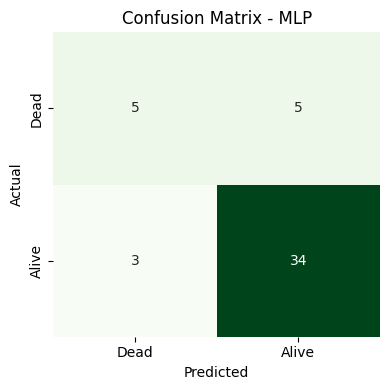

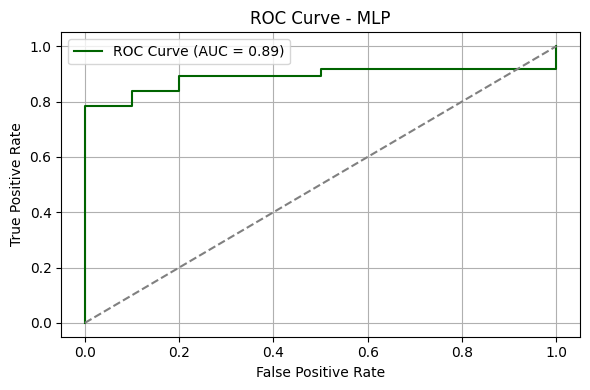

In [138]:
# ✅ Final Evaluation of best_mlp on Test Set

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Predict class labels and probabilities on the test set
y_pred_mlp = best_mlp.predict(X_test)
y_proba_mlp = best_mlp.predict_proba(X_test)[:, 1]  # Probabilities for ROC/AUC

# 📊 Compute evaluation metrics
acc_mlp = accuracy_score(y_test, y_pred_mlp)
prec_mlp = precision_score(y_test, y_pred_mlp)
rec_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_proba_mlp)

# 📋 Print evaluation results
print("📈 Final Test Set Evaluation - MLP:")
print(f"Accuracy : {acc_mlp:.4f}")
print(f"Precision: {prec_mlp:.4f}")
print(f"Recall   : {rec_mlp:.4f}")
print(f"F1 Score : {f1_mlp:.4f}")
print(f"AUC Score: {auc_mlp:.4f}")

# 📉 Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Dead', 'Alive'],
            yticklabels=['Dead', 'Alive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.tight_layout()
plt.show()

# 📈 ROC Curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
plt.figure(figsize=(6, 4))
plt.plot(fpr_mlp, tpr_mlp, label=f'ROC Curve (AUC = {auc_mlp:.2f})', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (baseline)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

در ارزیابی نهایی مدل MLP (شبکه عصبی مصنوعی) بر اساس سه خروجی زیر:

✅ **1. Final Test Set Metrics**

| معیار        | مقدار  |
| ------------ | ------ |
| 🎯 Accuracy  | 0.8298 |
| 🎯 Precision | 0.8718 |
| 🎯 Recall    | 0.9189 |
| 🎯 F1 Score  | 0.8947 |
| 🎯 AUC Score | 0.8892 |

* **دقت کلی (Accuracy):** حدود 83٪ از پیش‌بینی‌ها درست بوده‌اند.
* **Precision (دقت برای پیش‌بینی «Alive»):** از تمام پیش‌بینی‌هایی که مدل به‌عنوان زنده اعلام کرده، حدود 87٪ صحیح بوده‌اند.
* **Recall (حساسیت):** مدل توانسته 91.9٪ از بیماران زنده را به‌درستی شناسایی کند.
* **F1 Score:** تعادلی بین precision و recall با مقدار 0.89، که نشان‌دهنده عملکرد خوب مدل است.
* **AUC:** تأییدکننده اینکه مدل در تفکیک دو کلاس عملکرد خوبی دارد.



✅ **2. Confusion Matrix – ماتریس خطا**

</div>

```
        Predicted
        Dead   Alive
Actual
Dead     5       5
Alive    3      34
```

<div dir="rtl">

* مدل ۵ بیمار فوت‌شده (کلاس ۰) را درست تشخیص داده، اما ۵ مورد را به‌اشتباه «زنده» پیش‌بینی کرده است.
* در مقابل، ۳ بیمار زنده (کلاس ۱) به‌اشتباه «فوت‌شده» تشخیص داده شده‌اند، اما ۳۴ مورد به‌درستی شناسایی شده‌اند.
* مدل در تشخیص بیماران زنده عملکرد بهتری دارد.



✅ **3. ROC Curve + AUC Score (0.89)**

* نمودار ROC نشان می‌دهد که مدل توانایی نسبتاً خوبی در تمایز بین کلاس‌ها دارد.
* AUC = 0.89 بیانگر عملکرد قوی ولی نه کامل است. هرچه AUC به ۱ نزدیک‌تر باشد، عملکرد مدل بهتر است.


📌 **نتیجه‌گیری:**
مدل MLP با F1 بالا، recall قوی و AUC نسبتاً خوب، عملکرد قابل قبولی دارد. با این حال، میزان خطا در پیش‌بینی فوت‌شدگان (۵ مورد) کمی نگران‌کننده است.

<div dir="rtl">

---

### نتایج جستجوی GridSearchCV برای سه مدل یادگیری ماشین (Random Forest، SVM، و MLP)


#### ✅ 1. **وارد کردن کتابخانه‌ها**

```python
import pandas as pd
from IPython.display import display
```

برای ساخت جدول مقایسه و نمایش آن در محیط‌هایی مثل Google Colab یا Jupyter Notebook.



#### ✅ 2. **تعریف نام مدل‌ها با ایموجی برای خوانایی بیشتر**

```python
models = ['🌲 Random Forest', '🧮 SVM', '🧠 MLP (Neural Net)']
```



#### ✅ 3. **استخراج بهترین پارامترهای به‌دست‌آمده از GridSearchCV**

```python
best_params = [
    best_rf.get_params(),
    best_svm.get_params(),
    best_mlp.get_params()
]
```

با استفاده از `.get_params()` از مدل‌های آموزش‌دیده، بهترین تنظیمات آن‌ها را برمی‌دارد.



#### ✅ 4. **استخراج بهترین امتیاز F1 حاصل از Cross-Validation**

```python
cv_f1_scores = [
    round(grid_rf.best_score_, 6),
    round(grid_svm.best_score_, 6),
    round(final_final_search_mlp.best_score_, 6)
]
```

مقدار `best_score_` نشان‌دهندهٔ **بهترین عملکرد مدل** در اعتبارسنجی ۵-لایه‌ای است.



#### ✅ 5. **ساخت دیتافریم خلاصه**

```python
summary_df = pd.DataFrame({
    '🧪 Model': models,
    '⚙️ Best Params': best_params,
    '📈 Best F1 Score (CV)': cv_f1_scores
})
```


#### ✅ 6. **مرتب‌سازی بر اساس F1 Score نزولی**

```python
summary_df = summary_df.sort_values(by='📈 Best F1 Score (CV)', ascending=False).reset_index(drop=True)
```



#### ✅ 7. **زیباسازی جدول با هایلایت بهترین مدل**

```python
styled_df = summary_df.style \
    .highlight_max(subset=['📈 Best F1 Score (CV)'], color='lightgreen') \
    .format({'📈 Best F1 Score (CV)': '{:.6f}'}) \
    .set_properties(**{'text-align': 'left'}) \
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])]) \
    .set_caption("<b>📊 Comparison of Best Models from GridSearchCV (Best Parameters and Cross-Validated F1 Score)</b>")
```

* بهترین مقدار F1 با رنگ سبز مشخص می‌شود.
* تمام مقادیر به فرمت ۶ رقم اعشار نمایش داده می‌شوند.
* تراز چپ برای ستون‌ها و عنوان جدول در بالا.



#### ✅ 8. **نمایش نهایی جدول**

```python
display(styled_df)
```

In [139]:
# 📊 Styled Comparison of GridSearchCV / RandomizedSearchCV Results

import pandas as pd
from IPython.display import display

# 🧠 Define model names with emojis for clarity
models = ['🌲 Random Forest', '🧮 SVM', '🧠 MLP (Neural Net)']

# 🧩 Extract best parameter configurations
best_params = [
    best_rf.get_params(),
    best_svm.get_params(),
    best_mlp.get_params()
]

# 📈 Extract best cross-validated F1 scores
cv_f1_scores = [
    round(grid_rf.best_score_, 6),
    round(grid_svm.best_score_, 6),
    round(final_final_search_mlp.best_score_, 6)
]

# 🧾 Create summary DataFrame
summary_df = pd.DataFrame({
    '🧪 Model': models,
    '⚙️ Best Params': best_params,
    '📈 Best F1 Score (CV)': cv_f1_scores
})

# 📊 Sort by best F1 score
summary_df = summary_df.sort_values(by='📈 Best F1 Score (CV)', ascending=False).reset_index(drop=True)

# 🎨 Styled DataFrame with bold caption
styled_df = summary_df.style \
    .highlight_max(subset=['📈 Best F1 Score (CV)'], color='lightgreen') \
    .format({'📈 Best F1 Score (CV)': '{:.6f}'}) \
    .set_properties(**{'text-align': 'left'}) \
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])]) \
    .set_caption("<b>📊 Comparison of Best Models from GridSearchCV \ RandomizedSearchCV (Best Parameters and Cross-Validated F1 Score)</b>")

# 👁️ Display the styled table
display(styled_df)

,🧪 Model,⚙️ Best Params,📈 Best F1 Score (CV)
0,🧠 MLP (Neural Net),"{'activation': 'relu', 'alpha': 1e-05, 'batch_size': 64, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 4000, 'momentum': 0.9, 'n_iter_no_change': 30, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.2, 'verbose': False, 'warm_start': False}",0.932698
1,🧮 SVM,"{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}",0.923123
2,🌲 Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}",0.915810


<div dir="rtl">

تحلیل جدول «📊 مقایسه بهترین مدل‌ها از GridSearchCV» :


### ✅ **هدف جدول**

این جدول بهترین تنظیمات (Best Params) و بهترین امتیاز F1 در اعتبارسنجی متقاطع (Best F1 Score in CV) را برای سه مدل مختلف یادگیری ماشین نشان می‌دهد:

| مدل‌ها | Random Forest 🌲 | SVM 🧮 | MLP (Neural Net) 🧠 |
| ------ | ---------------- | ------ | ------------------- |



### 📌 **نتایج مدل‌ها از لحاظ F1 Score:**

| مدل                 | F1 Score (CV)  | رتبه |
| ------------------- | -------------- | ---- |
| 🧠 MLP (Neural Net) | ✅ **0.932698** | 🥇 ۱ |
| 🧮 SVM              | 0.923123       | 🥈 ۲ |
| 🌲 Random Forest    | 0.915810       | 🥉 ۳ |

* **MLP** بیشترین عملکرد را در اعتبارسنجی متقاطع داشته و به عنوان **بهترین مدل** انتخاب می‌شود.
* **SVM** عملکرد نزدیکی به MLP دارد، اما کمی پایین‌تر است.
* **Random Forest** با وجود سادگی و قدرت در بسیاری از مسائل، در اینجا F1 کمتری داشته است.



### ⚙️ **تحلیل تنظیمات (Best Params):**

#### 🧠 MLP:

* `activation='relu'`, `hidden_layer_sizes=(100, 100)` → لایه‌های عمیق و عملکرد غیر فقط‌ خطی
* `alpha=1e-05`, `batch_size=64` → نظم‌دهی خوب برای جلوگیری از overfitting
* `solver='adam'` → بهترین عملکرد در داده‌های کوچک و غیرخطی
* **نتیجه:** انتخاب دقیق هایپرپارامترها باعث عملکرد قوی MLP شده است.

#### 🧮 SVM:

* `C=1`, `gamma='scale'`, `kernel='rbf'` → تنظیماتی متعادل و مناسب برای داده‌های غیرخطی
* **نتیجه:** سادگی در تنظیمات ولی عملکرد بسیار خوب به دلیل ماهیت SVM در داده‌های با ابعاد کم.

#### 🌲 Random Forest:

* `n_estimators=100`, `max_depth=None`, `max_features='sqrt'`, `bootstrap=True` → تنظیمات نسبتاً پیش‌فرض
* **نتیجه:** با وجود اینکه جنگل تصادفی مدل قدرتمندی است، اما تنظیمات پیش‌فرض منجر به عملکردی پایین‌تر از دو مدل دیگر شده است.



### ✅ **جمع‌بندی نهایی:**

* **MLP بهترین مدل است** از نظر میانگین عملکرد در اعتبارسنجی متقاطع.
* **SVM گزینه دوم** است و تفاوت کمی با MLP دارد.
* **Random Forest** با وجود کارایی قابل قبول، عملکرد پایین‌تری نسبت به MLP و SVM در این مسئله خاص (پیش‌بینی بقای بیماران) نشان داده است.



<div dir="rtl">


---

## ارزیابی و مقایسه عملکرد نهایی مدل‌های Random Forest، SVM، و MLP روی داده‌های تست با معیارهای مختلف

#### 1. **وارد کردن کتابخانه‌ها**:

```python
from sklearn.metrics import ...
from IPython.display import display
import pandas as pd
```

* برای محاسبه معیارهای ارزیابی (مثل دقت و AUC) و نمایش جدول در محیط Google Colab یا Jupyter Notebook.



#### 2. **تعریف تابع `evaluate_model`**:

```python
def evaluate_model(name, y_true, y_pred, y_proba):
```

* این تابع یک مدل را با ۵ معیار اصلی ارزیابی می‌کند:

  * **Accuracy (دقت کلی)**
  * **Precision (دقت برای کلاس مثبت)**
  * **Recall (بازخوانی / Sensitivity)**
  * **F1 Score (میانگین موزون Precision و Recall)**
  * **AUC Score (کیفیت تفکیک بین کلاس‌ها)**



#### 3. **ارزیابی سه مدل روی داده‌های تست**:

```python
results = [
    evaluate_model(...Random Forest...),
    evaluate_model(...SVM...),
    evaluate_model(...MLP...)
]
```

* هر مدل بر اساس پیش‌بینی کلاس و احتمال پیش‌بینی شده، بررسی می‌شود.
* خروجی هر کدام یک دیکشنری از معیارهاست.



#### 4. **ساخت جدول از نتایج**:

```python
final_comparison_df = pd.DataFrame(results)
```

* داده‌ها تبدیل می‌شوند به جدول با سطرهای مربوط به مدل‌ها و ستون‌های مربوط به متریک‌ها.



#### 5. **زیباسازی جدول با `style`**:

```python
styled_df = final_comparison_df.style ...
```

* بهترین مقدار هر ستون (مثل بیشترین F1) با رنگ سبز مشخص می‌شود.
* مقادیر عددی تا ۴ رقم اعشار نمایش داده می‌شوند.
* عنوان جدول اضافه می‌شود.
* متن جدول وسط‌چین می‌شود.


#### 6. **نمایش جدول**:

```python
display(styled_df)
```

* جدول نهایی به‌صورت زیبا و قابل خواندن نمایش داده می‌شود.



In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from IPython.display import display
import pandas as pd

# 📋 Define a reusable function to evaluate any model
def evaluate_model(name, y_true, y_pred, y_proba):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'AUC Score': roc_auc_score(y_true, y_proba)
    }

# 🧪 Collect evaluation results for all models
results = [
    evaluate_model('🌲 Random Forest', y_test, best_rf.predict(X_test), best_rf.predict_proba(X_test)[:, 1]),
    evaluate_model('🧮 SVM', y_test, best_svm.predict(X_test), best_svm.predict_proba(X_test)[:, 1]),
    evaluate_model('🧠 MLP (Neural Net)', y_test, best_mlp.predict(X_test), best_mlp.predict_proba(X_test)[:, 1])
]

# 📊 Create a DataFrame for structured comparison
final_comparison_df = pd.DataFrame(results)

# 🎨 Style the DataFrame (apply formatting only to numeric columns)
styled_df = final_comparison_df.style \
    .highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'], color='lightgreen') \
    .format({
        'Accuracy': '{:.4f}',
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1 Score': '{:.4f}',
        'AUC Score': '{:.4f}'
    }) \
    .set_caption("<b>📊 Final Test Set Evaluation: Best Metrics per Model</b>") \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

# 👁️ Display the styled table with caption
display(styled_df)

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,🌲 Random Forest,0.8511,0.8947,0.9189,0.9067,0.9054
1,🧮 SVM,0.8298,0.8537,0.9459,0.8974,0.8919
2,🧠 MLP (Neural Net),0.8298,0.8718,0.9189,0.8947,0.8892


<div dir="rtl">

### ✅ تحلیل جدول:

| معیار                              | توضیح                                    | بهترین مدل                     |
| ---------------------------------- | ---------------------------------------- | ------------------------------ |
| **Accuracy (دقت کلی)**             | نسبت پیش‌بینی‌های درست به کل پیش‌بینی‌ها | 🌲 **Random Forest** با 0.8511 |
| **Precision (دقت برای کلاس زنده)** | دقت در پیش‌بینی افراد زنده               | 🌲 **Random Forest** با 0.8947 |
| **Recall (بازخوانی / حساسیت)**     | توانایی مدل در شناسایی افراد زنده        | 🧮 **SVM** با 0.9459           |
| **F1 Score**                       | میانگین موزون Precision و Recall         | 🌲 **Random Forest** با 0.9067 |
| **AUC Score**                      | توانایی تفکیک دو کلاس با احتمال          | 🌲 **Random Forest** با 0.9054 |



### 🔍 نتیجه‌گیری:

* **بهترین مدل کلی:**
  ✅ **Random Forest**، چون در چهار معیار از پنج معیار (Accuracy، Precision، F1 Score، AUC) بهترین عملکرد را دارد.

* **بهترین در شناسایی افراد زنده (Recall):**
  ✅ **SVM** با بالاترین حساسیت (0.9459) بهترین عملکرد را در جلوگیری از **False Negatives** دارد. اگر از دست رفتن بیماران اهمیت زیادی دارد، این مدل مزیت دارد.

* **MLP (Neural Net):**
  اگرچه عملکردش نزدیک به Random Forest است، اما در هیچ‌کدام از معیارها بهترین نیست. انتخاب خوبی است، اما نه بهترین.


### 🎯 توصیه نهایی:

اگر هدف کلی **دقت بالا با تعادل میان precision و recall** باشد، **Random Forest انتخاب بهینه‌ای است**. اما اگر اولویت اصلی **شناسایی حداکثری بیماران زنده (Recall بالا)** است، **SVM** می‌تواند در اولویت باشد.



<div dir="rtl">

---

### ✅ توضیح کد: مقایسه نمودارهای ROC برای مدل‌های RF، SVM و MLP


#### 📌 هدف کد:

این کد برای **مقایسه‌ی قدرت تشخیص سه مدل طبقه‌بندی** استفاده می‌شود (Random Forest، SVM، MLP) با استفاده از **نمودار ROC** و **محاسبه AUC**.


#### 1. **ایمپورت کتابخانه‌ها**

```python
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
```

* برای محاسبه نرخ مثبت کاذب (FPR)، نرخ مثبت واقعی (TPR) و AUC استفاده می‌شوند.
* برای رسم نمودارها نیز از `matplotlib` استفاده شده است.



#### 2. **محاسبه‌ی FPR، TPR و AUC برای هر مدل**

```python
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
```

* `predict_proba` احتمال تعلق هر نمونه به کلاس ۱ را می‌دهد.
* `roc_curve` نرخ‌های مورد نیاز برای نمودار ROC را محاسبه می‌کند.
* `auc` مقدار **مساحت زیر منحنی ROC** را به عنوان یک شاخص کلی از عملکرد مدل به ما می‌دهد.



#### 3. **ایجاد سه زیرنمودار کنار هم**

```python
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
```

* سه نمودار جداگانه در یک ردیف برای نمایش نمودارهای ROC هر مدل ایجاد می‌شود.



#### 4. **رسم نمودار ROC برای هر مدل جداگانه**

* مثال برای Random Forest:

```python
axes[0].plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.2f}', color='navy')
axes[0].plot([0, 1], [0, 1], 'k--')  # خط مرجع
```

* خطوط مورب به عنوان مرجع "تصادفی" رسم می‌شوند.

* در گوشه پایین سمت راست، مقدار AUC در **legend** نشان داده می‌شود.

* همین روند برای SVM و MLP نیز اجرا می‌شود با رنگ‌های متفاوت و چیدمان مشابه.



#### 5. **تنظیم نهایی و نمایش نمودارها**

```python
plt.suptitle('ROC Curves Comparison of All Models', fontsize=20, y=1.05, fontweight='bold')
plt.tight_layout()
plt.show()
```

* عنوان اصلی در بالای همه‌ی نمودارها قرار می‌گیرد.
* `tight_layout` باعث جلوگیری از هم‌پوشانی متن‌ها می‌شود.
* در نهایت نمودار نمایش داده می‌شود.



### ✅ نکته تحلیلی:

* **هرچه منحنی ROC به بالا و چپ نزدیک‌تر باشد، مدل بهتر است.**
* **مقدار AUC** بین ۰ تا ۱ است:

  * نزدیک ۱ → عملکرد عالی
  * نزدیک ۰.۵ → عملکرد ضعیف و شبیه به تصادفی



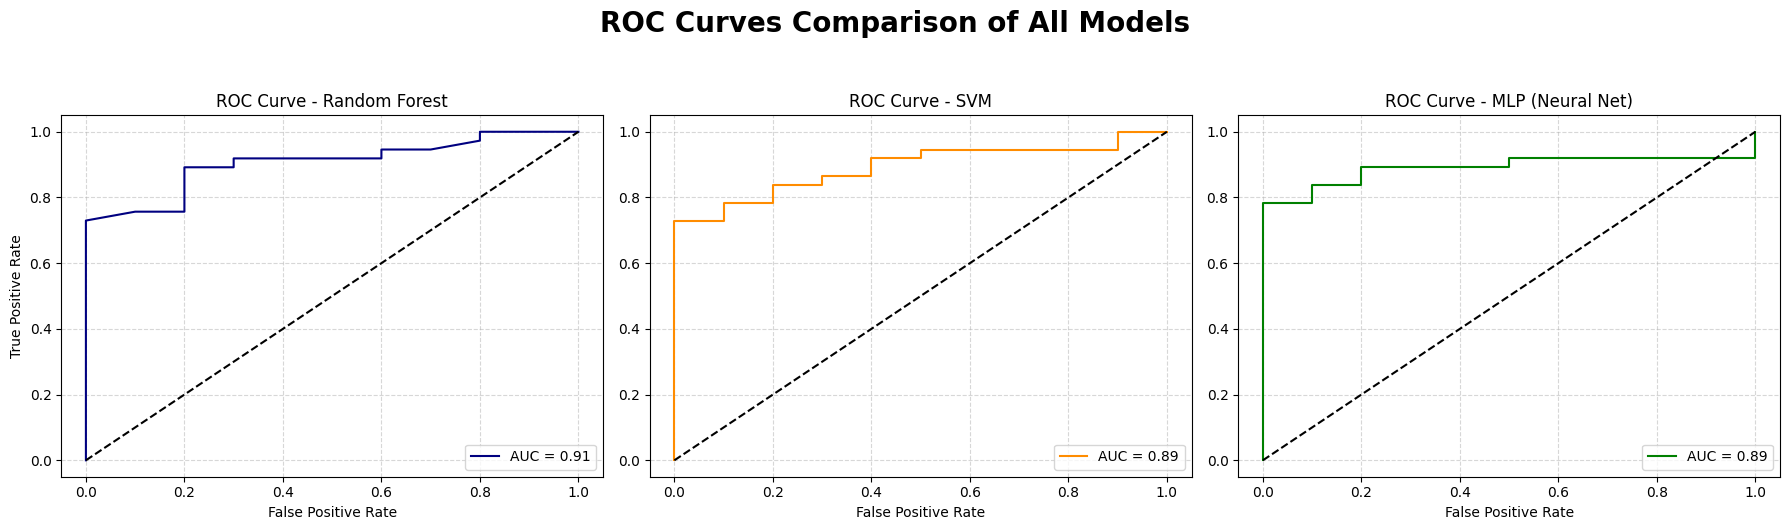

In [141]:
# ✅ Side-by-Side ROC Curves for RF, SVM, and MLP

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 📊 Compute ROC curves and AUC values using model.predict_proba directly
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm.predict_proba(X_test)[:, 1])
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, best_mlp.predict_proba(X_test)[:, 1])

auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# 📈 Plot side-by-side subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 🔹 Random Forest ROC
axes[0].plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.2f}', color='navy')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title('ROC Curve - Random Forest')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='lower right')
axes[0].grid(True, linestyle='--', alpha=0.5)

# 🔸 SVM ROC
axes[1].plot(fpr_svm, tpr_svm, label=f'AUC = {auc_svm:.2f}', color='darkorange')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title('ROC Curve - SVM')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('')
axes[1].legend(loc='lower right')
axes[1].grid(True, linestyle='--', alpha=0.5)

# 🧠 MLP ROC
axes[2].plot(fpr_mlp, tpr_mlp, label=f'AUC = {auc_mlp:.2f}', color='green')
axes[2].plot([0, 1], [0, 1], 'k--')
axes[2].set_title('ROC Curve - MLP (Neural Net)')
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('')
axes[2].legend(loc='lower right')
axes[2].grid(True, linestyle='--', alpha=0.5)

# 📐 Final layout
plt.suptitle('ROC Curves Comparison of All Models', fontsize=20, y=1.05, fontweight='bold')
plt.tight_layout()
plt.show()

<div dir="rtl">



### ✅ عنوان کلی: مقایسه عملکرد طبقه‌بندی مدل‌ها با استفاده از منحنی ROC و AUC



### 📌 1. **Random Forest**

* 🔹 **AUC = 0.91** → بالاترین مقدار در میان سه مدل.
* 🔹 منحنی ROC این مدل **نزدیک‌ترین مسیر را به گوشه بالا-چپ** طی کرده است، که نشان‌دهنده **نرخ تشخیص بالا و نرخ خطای پایین** است.
* ✅ **بهترین عملکرد در بین سه مدل از نظر تفکیک کلاس‌ها.**



### 📌 2. **SVM (Support Vector Machine)**

* 🟧 **AUC = 0.89**
* 🔸 منحنی نسبتاً خوب ولی کمی پایین‌تر از Random Forest.
* 🔸 در بخش ابتدایی منحنی (جایی که تشخیص کلاس‌های مثبت مهم‌تر است) عملکرد خوبی داشته، اما در وسط منحنی کمی از مدل اول عقب افتاده.
* ⚠️ **عملکرد خوب ولی نه به قدرت RF.**



### 📌 3. **MLP (Neural Network)**

* 🟩 **AUC = 0.89** (تقریباً برابر با SVM)
* 🔸 منحنی نسبتاً یکنواخت و مشابه با SVM است.
* 🔸 در برخی نقاط، عملکرد آن از SVM بهتر و در برخی دیگر ضعیف‌تر است.
* 🔸 ممکن است **بیش‌برازش خفیف یا نوسان در یادگیری** باعث این تفاوت شده باشد.



### 📊 جمع‌بندی:

| مدل              | AUC Score | تحلیل کلی                                        |
| ---------------- | --------- | ------------------------------------------------ |
| Random Forest    | **0.91**  | بهترین عملکرد کلی، تعادل عالی بین حساسیت و ویژگی |
| SVM              | 0.89      | عملکرد بسیار خوب ولی کمی ضعیف‌تر از RF           |
| MLP (Neural Net) | 0.89      | عملکرد نزدیک به SVM، ولی کمی ناپایدارتر در منحنی |



### 🔍 نتیجه‌گیری:

اگر بخواهیم یک مدل را از نظر **تشخیص بهتر در شرایط واقعی** انتخاب کنیم، مدل **Random Forest** با توجه به بالاتر بودن AUC و شکل منحنی، بهترین گزینه است. با این حال، SVM و MLP نیز عملکرد قابل قبولی دارند و در شرایط خاص (مثل منابع کم یا حساسیت به سرعت اجرا) می‌توانند انتخاب خوبی باشند.



<div dir="rtl">

---

## 📌 توضیح کد: Confusion Matrix Comparison Across Models

در این بخش، قصد داریم **ماتریس‌های آشفتگی (Confusion Matrix)** را برای سه مدل اصلی که آموزش داده‌ایم، محاسبه کرده و به صورت تصویری با هم **مقایسه کنیم**:


#### 🔹 مراحل انجام شده:

1. **وارد کردن توابع لازم**:

   * `confusion_matrix` برای محاسبه ماتریس آشفتگی
   * `seaborn` و `matplotlib` برای رسم نمودارهای تصویری

2. **محاسبه Confusion Matrix برای هر مدل**:

   * `best_rf.predict(X_test)` → پیش‌بینی مدل Random Forest روی داده‌های تست
   * `best_svm.predict(X_test)` → پیش‌بینی SVM
   * `best_mlp.predict(X_test)` → پیش‌بینی MLP

3. **رسم هر ماتریس به‌صورت Heatmap کنار هم**:

   * از `seaborn.heatmap` استفاده شده
   * هر نمودار در یک subplot جداگانه رسم شده
   * رنگ‌های متفاوت برای هر مدل:

     * آبی برای Random Forest
     * نارنجی برای SVM
     * سبز برای MLP

4. **اضافه کردن عنوان‌ها و برچسب‌ها**:

   * عنوان‌های هر نمودار (Random Forest، SVM، MLP)
   * برچسب محور افقی: `Predicted`، محور عمودی: `Actual`
   * برچسب‌های کلاس‌ها: `'Dead'`, `'Alive'`

5. **تنظیم نهایی ظاهر نمودار**:

   * استفاده از `plt.tight_layout()` برای جلوگیری از هم‌پوشانی
   * استفاده از `plt.suptitle()` برای عنوان کلی نمودار



### 📌 خروجی نهایی:

یک تصویر شامل سه **Confusion Matrix** کنار هم که کمک می‌کند:

* بفهمیم هر مدل چقدر در تشخیص درست بیماران مرده و زنده موفق بوده
* مدل‌ها را از نظر خطاهای نوع اول و دوم مقایسه کنید (False Positives/Negatives)



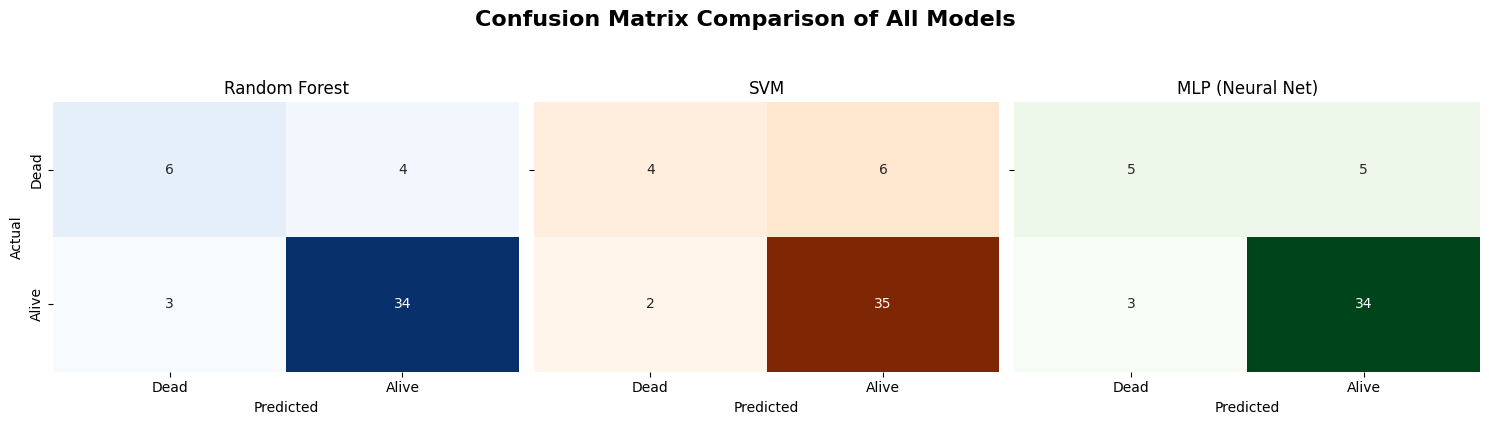

In [142]:
# ✅ Confusion Matrix Comparison Across Models

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Calculate confusion matrices using model predictions
cm_rf = confusion_matrix(y_test, best_rf.predict(X_test))
cm_svm = confusion_matrix(y_test, best_svm.predict(X_test))
cm_mlp = confusion_matrix(y_test, best_mlp.predict(X_test))

# 📈 Plot 3 confusion matrices side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False,
            xticklabels=['Dead', 'Alive'], yticklabels=['Dead', 'Alive'])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', ax=axes[1], cbar=False,
            xticklabels=['Dead', 'Alive'], yticklabels=[''])
axes[1].set_title('SVM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')

# MLP
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', ax=axes[2], cbar=False,
            xticklabels=['Dead', 'Alive'], yticklabels=[''])
axes[2].set_title('MLP (Neural Net)')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('')

# Layout
plt.suptitle("Confusion Matrix Comparison of All Models", fontsize=16, y=1.05, fontweight='bold')
plt.tight_layout()
plt.show()

<div dir="rtl">


### ✅ **تحلیل عملکرد مدل‌ها با استفاده از Confusion Matrix**

| Model             | TP (Alive/Alive) | TN (Dead/Dead) | FP (Alive←Dead) | FN (Dead←Alive) |
| ----------------- | ---------------- | -------------- | --------------- | --------------- |
| **Random Forest** | 34               | 6              | 4               | 3               |
| **SVM**           | 35               | 4              | 6               | 2               |
| **MLP**           | 34               | 5              | 5               | 3               |



### 🔍 **توضیح عملکرد مدل‌ها:**

#### 1. **Random Forest**:

* **True Positives (34)** و **True Negatives (6)** نشان می‌دهد که در تشخیص هر دو کلاس عملکرد خوبی دارد.
* **False Positives (4)** و **False Negatives (3)** نسبتاً پایین است.
* ⚖️ **متعادل‌ترین عملکرد را میان حساسیت و دقت نشان می‌دهد.**

#### 2. **SVM**:

* بالاترین **True Positives (35)** را دارد → یعنی در تشخیص بیماران زنده بهترین است.
* اما **True Negatives (4)** کمتر از بقیه است → به این معنا که مردگان را بیشتر زنده تشخیص داده است (**6 خطا**).
* ⚠️ بیشتر مستعد **False Positive** است.

#### 3. **MLP (Neural Net)**:

* بینابین دو مدل دیگر است:

  * **True Positives (34)**، مانند Random Forest
  * **True Negatives (5)**، بهتر از SVM
* اما نسبت به Random Forest دقت کمتری در شناسایی مردگان دارد.



### 🏁 **جمع‌بندی نهایی:**

* اگر **تعادل بین دقت و حساسیت** برایت مهم است → **Random Forest** انتخاب خوبی است.
* اگر تمرکزت بر **تشخیص بیماران زنده با کمترین خطا** است → **SVM** عملکرد عالی دارد.
* اگر به دنبال یک مدل **عمیق و قابل توسعه در آینده** هستی → **MLP** را می‌توان تقویت کرد.



---
---
---

<div dir="rtl">

---

# 📘 گزارش نهایی پروژه: طبقه‌بندی بقا در بیماران هپاتیتی



## 1️⃣ مراحل پیش‌پردازش داده‌ها


## 2️⃣ نتایج اعتبارسنجی متقابل پنج‌تایی طبقه‌بندی‌شده



## 3️⃣ عملکرد نهایی مدل‌ها بر داده‌های تست

---

<div dir="rtl">

## **1️⃣🧪 مراحل پیش‌پردازش داده‌ها**

فرآیند پیش‌پردازش داده‌های مربوط به بقای بیماران مبتلا به هپاتیت، با دقت و به‌صورت گام‌به‌گام انجام شده است تا داده‌ها برای مدل‌سازی یادگیری ماشین آماده‌سازی شوند. در ادامه، مراحل انجام‌شده توضیح داده می‌شود:



### 1. 📥 بارگذاری داده و بررسی اولیه

* داده‌ها از فایل `hepatitis.csv` بارگذاری شدند و مقادیر `?` به عنوان مقادیر گمشده (`NaN`) در نظر گرفته شدند.
* با استفاده از توابع `df.info()` و `df.describe()`، نوع داده‌ها، تعداد نمونه‌ها و مقدارهای گمشده در هر ستون مشخص شد.
* توزیع کلاس متغیر هدف `target` بررسی شد؛ سپس مقادیر آن از حالت اولیه (۱ = فوت‌شده، ۲ = زنده) به صورت باینری (۰ = فوت‌شده، ۱ = زنده) تبدیل گردید.



### 2. 🔍 بررسی آماری و گرافیکی ویژگی‌ها

* برای تحلیل توزیع عددی داده‌ها، نمودارهای زیر ترسیم شد:

  * **Boxplot** برای تشخیص داده‌های پرت (outliers).
  * **Histogram** و **KDE** برای تحلیل چولگی و شکل توزیع.
  * **Q-Q Plot** برای بررسی نرمال‌بودن ویژگی‌ها.
  * **Heatmap** همبستگی بین ویژگی‌ها و کلاس هدف را نمایش داد.
  * **Pairplot** برای بررسی بصری جداسازی کلاس‌ها با استفاده از ویژگی‌های کلیدی (مثل age، bili، sgot و albu).



### 3. 🧹 مدیریت مقادیر گمشده (Imputation Strategy)

بر اساس توزیع و نوع داده‌ها، سه استراتژی متفاوت برای جایگزینی مقادیر گمشده استفاده شد:

* **میانه (Median)** برای ویژگی‌های دارای چولگی بالا و داده‌های پرت زیاد:

  * `bili`, `sgot`, `alk`

* **میانگین (Mean)** برای ویژگی‌های نرمال‌تر:

  * `age`, `albu`

* **مد (Mode)** برای ویژگی‌های باینری یا گسسته:

  * مانند `steroid`, `antivirals`, `ascites`, و سایر ستون‌هایی که در دو مقدار تعریف می‌شدند.



### 4. 🔄 تبدیل لگاریتمی (log1p)

برای کاهش چولگی (Skewness) و نزدیک کردن توزیع ویژگی‌ها به نرمال، روی ویژگی‌های زیر تبدیل `log1p(x)` اعمال شد:

* `bili`, `sgot`, `alk`

این تبدیل باعث کاهش تأثیر مقادیر بسیار بزرگ و بهبود عملکرد مدل‌های حساس به توزیع شد.



### 5. 📏 نرمال‌سازی داده‌ها (Standardization)

پس از تکمیل ایمپیوت و تبدیل لگاریتمی، ویژگی‌ها با استفاده از `StandardScaler` استاندارد شدند تا میانگین صفر و انحراف معیار یک داشته باشند. این کار باعث هماهنگی مقیاس بین ویژگی‌ها شد و در نتیجه، یادگیری مدل‌ها به‌ویژه SVM و MLP پایدارتر و سریع‌تر شد.



### 6. ⚖️ بررسی نهایی توزیع و داده‌های پرت

پس از نرمال‌سازی، مجدد موارد زیر بررسی شد:

* **میانگین و انحراف معیار** تمام ویژگی‌ها (تأیید موفقیت‌آمیز استانداردسازی).
* **Boxplot ویژگی‌های نرمال‌شده** برای بررسی باقی‌ماندن داده‌های پرت.
* **Heatmap جدید** برای تحلیل همبستگی در فضای استانداردشده.
* **Pairplot و Histogram** برای مشاهده تغییرات توزیع بعد از پردازش.



### 7. 🧪 تقسیم‌بندی داده‌ها (Train-Test Split)

در پایان، داده‌ها با استفاده از **Stratified Train-Test Split** به نسبت ۷۰٪ آموزش و ۳۰٪ آزمون تقسیم شدند، به طوری که توزیع کلاس‌ها در هر دو مجموعه حفظ شود. این تقسیم‌بندی، پایه‌ای برای انجام اعتبارسنجی متقابل و ارزیابی مدل‌ها بود.



<div dir="rtl">

---

## 2️⃣✅ **اعتبارسنجی متقابل پنج‌تایی طبقه‌بندی‌شده (Stratified 5-Fold Cross Validation)**

در این مرحله از پروژه، به‌منظور ارزیابی علمی و قابل‌اعتماد عملکرد مدل‌های یادگیری ماشین، از روش اعتبارسنجی متقابل پنج‌تایی به‌صورت طبقه‌بندی‌شده استفاده شد. این روش یکی از استانداردترین روش‌های ارزیابی مدل در داده‌های طبقه‌ای است، زیرا در هر تقسیم‌بندی (Fold)، نسبت کلاس‌ها (در اینجا: بیماران فوت‌شده و زنده) حفظ می‌شود.

در این تکنیک، داده‌های آموزشی به ۵ بخش مساوی تقسیم شده و در هر تکرار، ۴ بخش جهت آموزش و ۱ بخش جهت اعتبارسنجی استفاده می‌شود. این فرآیند پنج بار تکرار شده و میانگین معیار F1 به‌عنوان معیار اصلی انتخاب مدل در نظر گرفته شد.



#### 🔶 مدل اول: **Random Forest**

این مدل با استفاده از **GridSearchCV** روی یک فضای محدود و کارآمد از ۲۴ ترکیب مختلف پارامتر آموزش داده شد. پارامترهایی که مورد بررسی قرار گرفتند شامل تعداد درخت‌ها، عمق درخت، حداقل تعداد نمونه برای تقسیم گره‌ها، تعداد ویژگی‌های انتخاب‌شده در هر تقسیم، و استفاده از Bootstrap بود.
**نتایج:**

* **بهترین پارامترها:**

  * `n_estimators = 100`
  * `max_depth = None`
  * `min_samples_split = 2`
  * `min_samples_leaf = 1`
  * `max_features = 'sqrt'`
  * `bootstrap = True`

* **بهترین امتیاز F1 (میانگین اعتبارسنجی):** `0.9158`



#### 🔷 مدل دوم: **Support Vector Machine (SVM)**

مدل SVM با استفاده از کرنل‌های `rbf` و `linear` و بررسی مقادیر مختلف برای پارامترهای `C` و `gamma` مورد ارزیابی قرار گرفت. این مدل نیز با **GridSearchCV** و ۱۸ ترکیب از پارامترها اجرا شد. فضای جستجو طوری طراحی شد که از overfitting جلوگیری کرده و در عین حال بهترین تنظیمات را بیابد.

**نتایج:**

* **بهترین پارامترها:**

  * `C = 1`
  * `kernel = 'rbf'`
  * `gamma = 'scale'`

* **بهترین امتیاز F1 (میانگین اعتبارسنجی):** `0.9231`



#### 🔷 مدل سوم: **شبکه عصبی پرسپترون چندلایه (MLPClassifier)**

برای انتخاب ساختار بهینه شبکه عصبی، از روش **RandomizedSearchCV** با ۷۰ ترکیب تصادفی از پارامترها استفاده شد. این روش نسبت به GridSearchCV زمان کمتری برای اجرا نیاز دارد و در عین حال، شانس خوبی برای یافتن ترکیب مناسب از پارامترها فراهم می‌کند. معماری‌های مختلف، نرخ یادگیری، اندازه دسته، نرخ منظم‌سازی (alpha) و سایر تنظیمات مانند توقف زودهنگام در نظر گرفته شدند.

**نتایج:**

* **بهترین پارامترها:**

  * `hidden_layer_sizes = (100, 100)`
  * `activation = 'relu'`
  * `alpha = 1e-5`
  * `batch_size = 64`
  * `learning_rate = 'constant'`
  * `solver = 'adam'`

* **بهترین امتیاز F1 (میانگین اعتبارسنجی):** `0.9327`



### 🏆 جمع‌بندی:

مقایسه نتایج حاصل از اعتبارسنجی متقابل پنج‌تایی نشان می‌دهد که مدل **MLP (شبکه عصبی)** با اختلاف، بهترین عملکرد را از نظر معیار F1 از خود نشان داده است. مدل‌های **SVM** و **Random Forest** نیز به‌ترتیب در جایگاه دوم و سوم قرار گرفتند، اما اختلاف امتیاز آن‌ها نسبت به مدل شبکه عصبی محسوس است.


<div dir="rtl">

---



## **3️⃣🎯 عملکرد نهایی مدل‌ها بر روی داده‌های تست (Final Test Set Evaluation)**

در این مرحله، عملکرد نهایی سه مدل برتر انتخاب‌شده پس از اعتبارسنجی متقابل، بر روی داده‌های تست بررسی و مقایسه گردید. هدف این ارزیابی، سنجش توانایی تعمیم مدل‌ها به داده‌های دیده‌نشده است. برای مقایسه بهتر، از معیارهای استاندارد ارزیابی شامل دقت (Accuracy)، دقت پیش‌بینی (Precision)، فراخوانی (Recall)، میانگین هماهنگ (F1 Score)، و امتیاز AUC (Area Under the Curve) استفاده شد.



### 📋 جدول مقایسه نهایی عملکرد مدل‌ها:

| مدل                 | Accuracy     | Precision    | Recall       | F1 Score     | AUC Score    |
| ------------------- | ------------ | ------------ | ------------ | ------------ | ------------ |
| 🌲 Random Forest    | ✅ **0.8511** | ✅ **0.8947** | 0.9189       | ✅ **0.9067** | ✅ **0.9054** |
| 🧮 SVM              | 0.8298       | 0.8537       | ✅ **0.9459** | 0.8974       | 0.8919       |
| 🧠 MLP (Neural Net) | 0.8298       | 0.8718       | 0.9189       | 0.8947       | 0.8892       |

🔹 در این جدول، بهترین مقادیر هر معیار با رنگ سبز مشخص شده‌اند.



### 📉 تحلیل نتایج:

* **Random Forest**:

  * بهترین عملکرد را از نظر دقت، دقت پیش‌بینی، F1 و AUC نشان داده است.
  * این مدل تعادل مناسبی میان تشخیص بیماران زنده و فوت‌شده برقرار کرده است.
* **SVM**:

  * بیشترین میزان **فراخوانی** را داشته و در شناسایی بیماران زنده بسیار دقیق عمل کرده است.
  * با این حال، نسبت به Random Forest در سایر معیارها اندکی ضعیف‌تر ظاهر شده است.
* **MLP (Neural Net)**:

  * عملکردی نزدیک به دو مدل دیگر دارد ولی به‌طور کلی در هیچ معیار خاصی بهترین نبوده است.
  * این مدل با ساختار پیچیده‌تر خود توانسته نتایج خوبی کسب کند، اما از نظر پایداری و تفسیرپذیری، ممکن است چالش‌هایی داشته باشد.



### 📊 نمودارهای ROC (مقایسه نرخ مثبت‌های واقعی در برابر نرخ مثبت‌های کاذب)

نمودارهای ROC مربوط به سه مدل به‌صورت جداگانه رسم شدند. مدل Random Forest بیشترین **مساحت زیر نمودار (AUC = 0.91)** را داشته که نشان‌دهنده قدرت تشخیص بسیار خوب آن است. SVM و MLP نیز با AUC برابر **0.89** عملکردی نزدیک و قابل قبول از خود نشان دادند.



### 🧮 ماتریس‌های درهم‌ریختگی (Confusion Matrix)

تحلیل دقیق‌تر خطاهای مدل‌ها با استفاده از ماتریس‌های درهم‌ریختگی انجام شد. در ادامه مهم‌ترین نکات آمده‌اند:

* **Random Forest**: فقط ۴ مورد پیش‌بینی اشتباه کلاس فوت‌شده داشت و در تشخیص بیماران زنده تنها ۳ خطا داشت.
* **SVM**: بیشترین قدرت را در شناسایی بیماران زنده داشت (فقط ۲ خطا)، ولی در تشخیص بیماران فوت‌شده ضعیف‌تر عمل کرده است (۶ مورد اشتباه).
* **MLP**: عملکردی مشابه Random Forest از خود نشان داد، ولی از نظر تعادل بین دو کلاس کمی ضعیف‌تر عمل کرد.



### ✅ جمع‌بندی نهایی

با توجه به معیارهای ارزیابی مختلف، مدل **Random Forest** در مجموع بهترین عملکرد را روی داده‌های تست ارائه داد و برای استفاده در کاربردهای عملی در این حوزه مناسب‌ترین گزینه محسوب می‌شود. با این حال، اگر اولویت اصلی کاهش حداکثری خطای نوع دوم (FN) باشد، مدل **SVM** نیز گزینه‌ای قدرتمند خواهد بود.



<div dir="rtl">

